# Capstone Project: Cellular Device Originated Melicious Attack Detection

**Overview**: In this application, your goal is to detect melicious traffic and identify the type of attack.



Understanding the Features


Data description:


```
Input variables:

1 - Seq (numeric) - argus sequence number.
2 - Dur (numeric) - record total duration. 
3 - RunTime (numeric) - total active flow run time. This value is generated through aggregation, and is the sum
of the records duration.
4 - Mean (numeric) - average duration of aggregated records.
5 - Sum (numeric) - total accumulated durations of aggregated records.
6 - Min (numeric) - minimum duration of aggregated records.
7 - Max (numeric) - maximum duration of aggregated records.
8 - Proto (Categorical) - transaction protocol.
9 - sTos (numeric) - source TOS byte value.
10 - dTos (numeric) - destination TOS byte value.
11 - sDSb (categorical) - source diff serve byte value.
12 - dDSb (categorical) - destination diff serve byte value.
13 - sTtl (numeric) - src -> dst TTL value.
14 - dTtl (numeric) - dst -> src TTL value.
15 - sHops (numeric) - estimate of number of IP hops from src to this point.
16 - dHops (numeric) - estimate of number of IP hops from dst to this point.
17 - Cause (categorical) - Argus record cause code. Valid values are Start, Status, Stop, Close, Error.
18 - TotPkts (numeric) - total transaction packet count.
19 - SrcPkts (numeric) - src -> dst packet count.
20 - DstPkts (numeric) - dst -> src packet count.
21 - TotBytes (numeric) - total transaction bytes.
22 - SrcBytes (numeric) - src -> dst transaction bytes.
23 - DstBytes (numeric) - dst -> src transaction bytes.
24 - Offset (numeric) - record byte offset in file or stream.
25 - sMeanPktSz (numeric) - Mean of the flow packet size transmitted by the src (initiator).
26 - dMeanPktSz (numeric) - Mean of the flow packet size transmitted by the dst (target).
27 - Load (numeric) - bits per second.
28 - SrcLoad (numeric) - source bits per second.
29 - DstLoad (numeric) - destination bits per second.
30 - Loss (numeric) - pkts retransmitted or dropped.
31 - SrcLoss (numeric) - source pkts retransmitted or dropped.
32 - DstLoss (numeric) - destination pkts retransmitted or dropped.
33 - pLoss (numeric) - percent pkts retransmitted or dropped.
34 - SrcGap (numeric) - source bytes missing in the data stream.
35 - DstGap (numeric) - destination bytes missing in the data stream.
36 - Rate (numeric) - pkts per second.
37 - SrcRate (numeric) - source pkts per second.
38 - DstRate (numeric) - destination pkts per second.
39 - State (categorical) - transaction state.
40 - SrcWin (numeric) - source TCP window advertisement.
42 - DstWin (numeric) - destination TCP window advertisement.
43 - sVid (numeric) - source VLAN identifier.
44 - dVid (numeric) - destination VLAN identifier.
45 - SrcTCPBase (numeric) - source TCP base sequence number.
46 - DstTCPBase (numeric) - destination TCP base sequence number.
47 - TcpRtt (numeric) - TCP connection setup round-trip time, the sum of ’synack’ and ’ackdat’.
48 - SynAck (numeric) - TCP connection setup time, the time between the SYN and the SYN_ACK packets.
49 - AckDat (numeric) - TCP connection setup time, the time between the SYN_ACK and the ACK packets.
50 - Attack Tool (categorical) - Type of source that launched the attack.

Targets:
51 - Label (categorical) - Metadata label.
52 - Attack Type (categorical) - Type of attack.

```



In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import numpy as np
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import auc as skl_auc
from sklearn.metrics import precision_recall_fscore_support as score
from pandas.plotting import table
from sklearn.dummy import DummyClassifier

In [4]:
import textwrap
import warnings
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df_large = pd.read_csv('data/combined.csv')
df = df_large.sample(n=50000,random_state = 40)

In [6]:
df.head()

Unnamed: 0    Seq       Dur   RunTime      Mean       Sum       Min  \
875284       146968  51765  0.000000  0.000000  0.000000  0.000000  0.000000   
862152       133836   3105  2.578405  2.578405  2.578405  2.578405  2.578405   
206914       206914   9587  0.000000  0.000000  0.000000  0.000000  0.000000   
649588       649588  30890  4.455998  4.455998  4.455998  4.455998  4.455998   
1047563      319247  15329  0.000000  0.000000  0.000000  0.000000  0.000000   

              Max Proto  sTos  dTos sDSb dDSb   sTtl  dTtl  sHops  dHops  \
875284   0.000000   udp   0.0   NaN  cs0  NaN   63.0   NaN    1.0    NaN   
862152   2.578405   udp   0.0   NaN  cs0  NaN   63.0   NaN    1.0    NaN   
206914   0.000000   udp   0.0   NaN  cs0  NaN   63.0   NaN    1.0    NaN   
649588   4.455998   udp   0.0   NaN  cs0  NaN  249.0   NaN    7.0    NaN   
1047563  0.000000   udp   0.0   NaN  cs0  NaN   63.0   NaN    1.0    NaN   

          Cause  TotPkts  SrcPkts  DstPkts  TotBytes  SrcBytes  DstBytes  \
875284   Status        1        1        0        42        42         0   
862152   Status        2        2        0        84        84         0   
206914   Status        1        1        0        42        42         0   
649588    Start        2        2        0       148       148         0   
1047563  Status        1        1        0        42        42         0   

           Offset  sMeanPktSz  dMeanPktSz        Load     SrcLoad  DstLoad  \
875284    8419356        42.0         0.0    0.000000    0.000000      0.0   
862152    7311480        42.0         0.0  130.313126  130.313126      0.0   
206914   13381224        42.0         0.0    0.000000    0.000000      0.0   
649588   16951584        74.0         0.0  132.854645  132.854645      0.0   
1047563  22895580        42.0         0.0    0.000000    0.000000      0.0   

         Loss  SrcLoss  DstLoss  pLoss  SrcGap  DstGap      Rate   SrcRate  \
875284      0        0        0    0.0     NaN     NaN  0.000000  0.000000   
862152      0        0        0    0.0     NaN     NaN  0.387837  0.387837   
206914      0        0        0    0.0     NaN     NaN  0.000000  0.000000   
649588      0        0        0    0.0     NaN     NaN  0.224417  0.224417   
1047563     0        0        0    0.0     NaN     NaN  0.000000  0.000000   

         DstRate State  SrcWin  DstWin   sVid  dVid  SrcTCPBase  DstTCPBase  \
875284       0.0   REQ     NaN     NaN    NaN   NaN         NaN         NaN   
862152       0.0   REQ     NaN     NaN    NaN   NaN         NaN         NaN   
206914       0.0   REQ     NaN     NaN    NaN   NaN         NaN         NaN   
649588       0.0   INT     NaN     NaN  610.0   NaN         NaN         NaN   
1047563      0.0   REQ     NaN     NaN    NaN   NaN         NaN         NaN   

         TcpRtt  SynAck  AckDat      Label Attack Type Attack Tool  
875284      0.0     0.0     0.0  Malicious    UDPFlood      Hping3  
862152      0.0     0.0     0.0  Malicious    UDPFlood      Hping3  
206914      0.0     0.0     0.0  Malicious    UDPFlood      Hping3  
649588      0.0     0.0     0.0     Benign      Benign      Benign  
1047563     0.0     0.0     0.0  Malicious    UDPFlood      Hping3

In [7]:

df.tail()

Unnamed: 0    Seq       Dur   RunTime      Mean       Sum       Min  \
852042       123726  28580  0.000000  0.000000  0.000000  0.000000  0.000000   
631188       631188  20108  0.000000  0.000000  0.000000  0.000000  0.000000   
1171353      443037    630  0.000000  0.000000  0.000000  0.000000  0.000000   
552594       552594  31771  0.000000  0.000000  0.000000  0.000000  0.000000   
1015284      286968  38374  2.582848  2.582848  2.582848  2.582848  2.582848   

              Max Proto  sTos  dTos sDSb dDSb   sTtl  dTtl  sHops  dHops  \
852042   0.000000   udp   0.0   NaN  cs0  NaN   63.0   NaN    1.0    NaN   
631188   0.000000   tcp   0.0   0.0  cs0  cs0   63.0  59.0    1.0    5.0   
1171353  0.000000  icmp   0.0   NaN  cs0  NaN   58.0   NaN    6.0    NaN   
552594   0.000000   udp   0.0   NaN  cs0  NaN  249.0   NaN    7.0    NaN   
1015284  2.582848   udp   0.0   NaN  cs0  NaN   63.0   NaN    1.0    NaN   

          Cause  TotPkts  SrcPkts  DstPkts  TotBytes  SrcBytes  DstBytes  \
852042   Status        1        1        0        42        42         0   
631188   Status        1        0        1        66         0        66   
1171353   Start        1        1        0        98        98         0   
552594    Start        1        1        0        74        74         0   
1015284  Status        2        2        0        84        84         0   

           Offset  sMeanPktSz  dMeanPktSz        Load     SrcLoad  DstLoad  \
852042    6459120        42.0         0.0    0.000000    0.000000      0.0   
631188   13624756         0.0        66.0    0.000000    0.000000      0.0   
1171353    124448        98.0         0.0    0.000000    0.000000      0.0   
552594    4813580        74.0         0.0    0.000000    0.000000      0.0   
1015284  20217436        42.0         0.0  130.088959  130.088959      0.0   

         Loss  SrcLoss  DstLoss  pLoss  SrcGap  DstGap     Rate  SrcRate  \
852042      0        0        0    0.0     NaN     NaN  0.00000  0.00000   
631188      0        0        0    0.0     0.0     0.0  0.00000  0.00000   
1171353     0        0        0    0.0     NaN     NaN  0.00000  0.00000   
552594      0        0        0    0.0     NaN     NaN  0.00000  0.00000   
1015284     0        0        0    0.0     NaN     NaN  0.38717  0.38717   

         DstRate State  SrcWin  DstWin   sVid  dVid    SrcTCPBase  \
852042       0.0   REQ     NaN     NaN    NaN   NaN           NaN   
631188       0.0   RST     NaN     NaN    NaN   NaN  2.416563e+09   
1171353      0.0   ECO     NaN     NaN    NaN   NaN           NaN   
552594       0.0   INT     NaN     NaN  610.0   NaN           NaN   
1015284      0.0   REQ     NaN     NaN    NaN   NaN           NaN   

           DstTCPBase    TcpRtt    SynAck    AckDat      Label Attack Type  \
852042            NaN  0.000000  0.000000  0.000000  Malicious    UDPFlood   
631188   1.697018e+09  0.031899  0.001686  0.030213  Malicious   HTTPFlood   
1171353           NaN  0.000000  0.000000  0.000000     Benign      Benign   
552594            NaN  0.000000  0.000000  0.000000     Benign      Benign   
1015284           NaN  0.000000  0.000000  0.000000  Malicious    UDPFlood   

        Attack Tool  
852042       Hping3  
631188    Goldeneye  
1171353      Benign  
552594       Benign  
1015284      Hping3

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 875284 to 1015284
Data columns (total 52 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   Seq          50000 non-null  int64  
 2   Dur          50000 non-null  float64
 3   RunTime      50000 non-null  float64
 4   Mean         50000 non-null  float64
 5   Sum          50000 non-null  float64
 6   Min          50000 non-null  float64
 7   Max          50000 non-null  float64
 8   Proto        50000 non-null  object 
 9   sTos         49992 non-null  float64
 10  dTos         10967 non-null  float64
 11  sDSb         49992 non-null  object 
 12  dDSb         10967 non-null  object 
 13  sTtl         49992 non-null  float64
 14  dTtl         10967 non-null  float64
 15  sHops        49992 non-null  float64
 16  dHops        10967 non-null  float64
 17  Cause        50000 non-null  object 
 18  TotPkts      50000 non-null  int64  
 19  Sr

In [9]:
# Lets remove unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [10]:
#Lets remove ragus Seq number since it is not generated by the device
df = df.loc[:, ~df.columns.str.contains('^Seq')]

In [11]:
#Lets remove ragus Seq number since it is not generated by the device
df = df.loc[:, ~df.columns.str.contains('^Cause')]

In [12]:
#Lets remove ragus Seq number since it is not generated by the device
df = df.loc[:, ~df.columns.str.contains('^Attack Tool')]

In [13]:
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        50000 non-null  int64  
 1   Dur          50000 non-null  float64
 2   RunTime      50000 non-null  float64
 3   Mean         50000 non-null  float64
 4   Sum          50000 non-null  float64
 5   Min          50000 non-null  float64
 6   Max          50000 non-null  float64
 7   Proto        50000 non-null  object 
 8   sTos         49992 non-null  float64
 9   dTos         10967 non-null  float64
 10  sDSb         49992 non-null  object 
 11  dDSb         10967 non-null  object 
 12  sTtl         49992 non-null  float64
 13  dTtl         10967 non-null  float64
 14  sHops        49992 non-null  float64
 15  dHops        10967 non-null  float64
 16  TotPkts      50000 non-null  int64  
 17  SrcPkts      50000 non-null  int64  
 18  DstPkts      50000 non-null  int64  
 19  TotB

In [14]:
print(df.describe());

              index           Dur       RunTime          Mean           Sum  \
count  5.000000e+04  50000.000000  50000.000000  50000.000000  50000.000000   
mean   6.057649e+05      1.365648      1.365648      1.365648      1.365648   
std    3.519909e+05      1.695812      1.695812      1.695812      1.695812   
min    9.900000e+01      0.000000      0.000000      0.000000      0.000000   
25%    3.002335e+05      0.000000      0.000000      0.000000      0.000000   
50%    6.047545e+05      0.000000      0.000000      0.000000      0.000000   
75%    9.120490e+05      2.580601      2.580601      2.580601      2.580601   
max    1.215879e+06      5.978457      5.978457      5.978457      5.978457   

                Min           Max          sTos          dTos          sTtl  \
count  50000.000000  50000.000000  49992.000000  10967.000000  49992.000000   
mean       1.365648      1.365648      0.887862      2.920580     81.264502   
std        1.695812      1.695812     12.645925    

### Exploratory data analysis

In [15]:
df.head()

index       Dur   RunTime      Mean       Sum       Min       Max Proto  \
0   875284  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   udp   
1   862152  2.578405  2.578405  2.578405  2.578405  2.578405  2.578405   udp   
2   206914  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   udp   
3   649588  4.455998  4.455998  4.455998  4.455998  4.455998  4.455998   udp   
4  1047563  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   udp   

   sTos  dTos sDSb dDSb   sTtl  dTtl  sHops  dHops  TotPkts  SrcPkts  DstPkts  \
0   0.0   NaN  cs0  NaN   63.0   NaN    1.0    NaN        1        1        0   
1   0.0   NaN  cs0  NaN   63.0   NaN    1.0    NaN        2        2        0   
2   0.0   NaN  cs0  NaN   63.0   NaN    1.0    NaN        1        1        0   
3   0.0   NaN  cs0  NaN  249.0   NaN    7.0    NaN        2        2        0   
4   0.0   NaN  cs0  NaN   63.0   NaN    1.0    NaN        1        1        0   

   TotBytes  SrcBytes  DstBytes    Offset  sMeanPktSz  dMeanPktSz        Load  \
0        42        42         0   8419356        42.0         0.0    0.000000   
1        84        84         0   7311480        42.0         0.0  130.313126   
2        42        42         0  13381224        42.0         0.0    0.000000   
3       148       148         0  16951584        74.0         0.0  132.854645   
4        42        42         0  22895580        42.0         0.0    0.000000   

      SrcLoad  DstLoad  Loss  SrcLoss  DstLoss  pLoss  SrcGap  DstGap  \
0    0.000000      0.0     0        0        0    0.0     NaN     NaN   
1  130.313126      0.0     0        0        0    0.0     NaN     NaN   
2    0.000000      0.0     0        0        0    0.0     NaN     NaN   
3  132.854645      0.0     0        0        0    0.0     NaN     NaN   
4    0.000000      0.0     0        0        0    0.0     NaN     NaN   

       Rate   SrcRate  DstRate State  SrcWin  DstWin   sVid  dVid  SrcTCPBase  \
0  0.000000  0.000000      0.0   REQ     NaN     NaN    NaN   NaN         NaN   
1  0.387837  0.387837      0.0   REQ     NaN     NaN    NaN   NaN         NaN   
2  0.000000  0.000000      0.0   REQ     NaN     NaN    NaN   NaN         NaN   
3  0.224417  0.224417      0.0   INT     NaN     NaN  610.0   NaN         NaN   
4  0.000000  0.000000      0.0   REQ     NaN     NaN    NaN   NaN         NaN   

   DstTCPBase  TcpRtt  SynAck  AckDat      Label Attack Type  
0         NaN     0.0     0.0     0.0  Malicious    UDPFlood  
1         NaN     0.0     0.0     0.0  Malicious    UDPFlood  
2         NaN     0.0     0.0     0.0  Malicious    UDPFlood  
3         NaN     0.0     0.0     0.0     Benign      Benign  
4         NaN     0.0     0.0     0.0  Malicious    UDPFlood

In [16]:
# Check for missing values in percent

df.isna().mean().mul(100).round(2)

index           0.00
Dur             0.00
RunTime         0.00
Mean            0.00
Sum             0.00
Min             0.00
Max             0.00
Proto           0.00
sTos            0.02
dTos           78.07
sDSb            0.02
dDSb           78.07
sTtl            0.02
dTtl           78.07
sHops           0.02
dHops          78.07
TotPkts         0.00
SrcPkts         0.00
DstPkts         0.00
TotBytes        0.00
SrcBytes        0.00
DstBytes        0.00
Offset          0.00
sMeanPktSz      0.00
dMeanPktSz      0.00
Load            0.00
SrcLoad         0.00
DstLoad         0.00
Loss            0.00
SrcLoss         0.00
DstLoss         0.00
pLoss           0.00
SrcGap         77.13
DstGap         77.13
Rate            0.00
SrcRate         0.00
DstRate         0.00
State           0.00
SrcWin         80.02
DstWin         85.70
sVid           90.68
dVid           99.83
SrcTCPBase     77.13
DstTCPBase     81.43
TcpRtt          0.00
SynAck          0.00
AckDat          0.00
Label        

In [17]:
sns.reset_orig() 
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

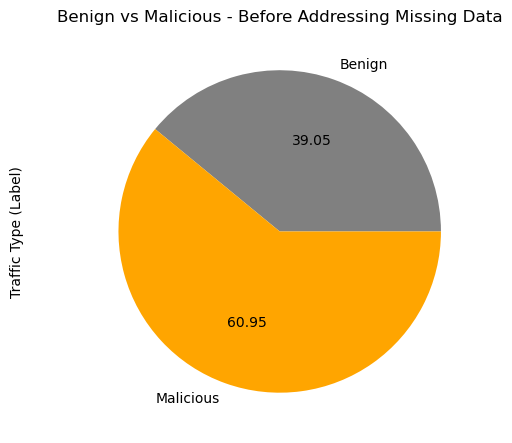

In [18]:
fig, ax2 = plt.subplots(ncols=1, figsize=(5, 5))
df.groupby('Label').size().plot(kind='pie', autopct='%.2f', colors=['gray', 'orange'], textprops={'fontsize': 10})
ax2.set_ylabel('Traffic Type (Label)\n\n\n', size=10)
plt.tight_layout()
plt.title('Benign vs Malicious - Before Addressing Missing Data')
plt.savefig('images/pie_benign_malicious_before_cleaning_data.png')
plt.show()


In [19]:
sns.reset_orig() 
plt.close()
plt.clf()

In [20]:
print('Shape before treating duplicates: ' + str(df.shape))
print('Duplicates : ' + str(df.duplicated().sum()))


Shape before treating duplicates: (50000, 49)
Duplicates : 0


#### Will address duplicates after addressing features with more than 80% missing data.

#### Features with missing data above 77% will be dropped.

In [21]:
# Address Missing Data 
# Data without features that have 77% or greater missing values

In [22]:
df_org = df.copy(deep=True)

In [23]:
columns = df.columns
val = df.isna().mean().mul(100).round(2)
nul_columns = []
for col in columns:
    if val[col] > 76 :
        nul_columns.append(col)

In [24]:
df = pd.DataFrame(df_org.drop(nul_columns, axis=1))

In [25]:
df.dropna(inplace=True)
df.isna().mean().mul(100).round(2)

index          0.0
Dur            0.0
RunTime        0.0
Mean           0.0
Sum            0.0
Min            0.0
Max            0.0
Proto          0.0
sTos           0.0
sDSb           0.0
sTtl           0.0
sHops          0.0
TotPkts        0.0
SrcPkts        0.0
DstPkts        0.0
TotBytes       0.0
SrcBytes       0.0
DstBytes       0.0
Offset         0.0
sMeanPktSz     0.0
dMeanPktSz     0.0
Load           0.0
SrcLoad        0.0
DstLoad        0.0
Loss           0.0
SrcLoss        0.0
DstLoss        0.0
pLoss          0.0
Rate           0.0
SrcRate        0.0
DstRate        0.0
State          0.0
TcpRtt         0.0
SynAck         0.0
AckDat         0.0
Label          0.0
Attack Type    0.0
dtype: float64

In [26]:
#Lets examine frequency category occurance

col_list = df.select_dtypes(include=['object', 'category']).columns.tolist()
print('_________________________________________\n')
for col in col_list:
    print('Feature: ' + str(col))
    category = df[col].value_counts().div(df.shape[0]).mul(100).round(2)
    category_df = category.reset_index()
    category_df.columns = ['category', 'freq in %']
    print(category_df)
    print('_________________________________________\n')

_________________________________________

Feature: Proto
  category  freq in %
0      udp      74.39
1      tcp      22.87
2     icmp       2.36
3     sctp       0.38
_________________________________________

Feature: sDSb
  category  freq in %
0      cs0      99.45
1       ef       0.31
2     af11       0.07
3     af41       0.05
4      cs7       0.05
5      cs6       0.03
6     af12       0.01
7       52       0.01
8        4       0.01
9      cs4       0.00
_________________________________________

Feature: State
  category  freq in %
0      REQ      48.94
1      INT      27.06
2      CON      10.55
3      RST       6.13
4      FIN       4.86
5      ECO       2.31
6      ACC       0.10
7      URP       0.04
8      TST       0.01
9      RSP       0.00
_________________________________________

Feature: Label
    category  freq in %
0  Malicious      60.96
1     Benign      39.04
_________________________________________

Feature: Attack Type
         category  freq in %
0         

In [27]:
print(df.shape)
print('Duplicates : ' + str(df.duplicated().sum()))
# remove duplicates
df.drop_duplicates(inplace = True)
print('Shape post treating duplicates: ' + str(df.shape))

(49992, 37)
Duplicates : 0
Shape post treating duplicates: (49992, 37)


<Figure size 640x480 with 0 Axes>

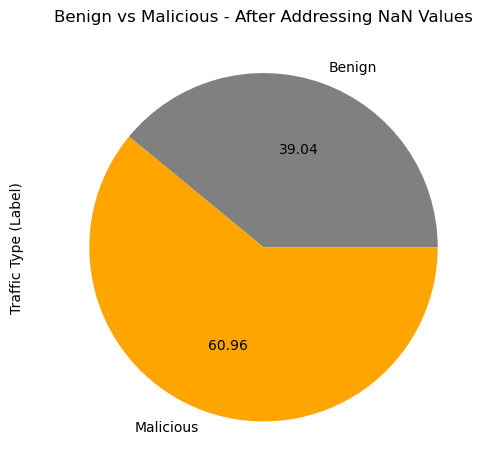

In [28]:
fig, ax2 = plt.subplots(ncols=1, figsize=(5, 5))
df.groupby('Label').size().plot(kind='pie', autopct='%.2f', colors=['gray', 'orange'], textprops={'fontsize': 10})
ax2.set_ylabel('Traffic Type (Label)\n', size=10)
plt.tight_layout()
plt.title('Benign vs Malicious - After Addressing NaN Values')
plt.savefig('images/pie_benign_malicious_after_cleaning_data.png')
plt.show()

Do we have imbalance in Attack Type classes?

Label      Attack Type   
Malicious  ICMPFlood            50
           SYNFlood            413
           UDPScan             695
           TCPConnectScan      879
           SYNScan             910
           SlowrateDoS        3038
           HTTPFlood          5591
           UDPFlood          18899
Benign     Benign            19517
dtype: int64

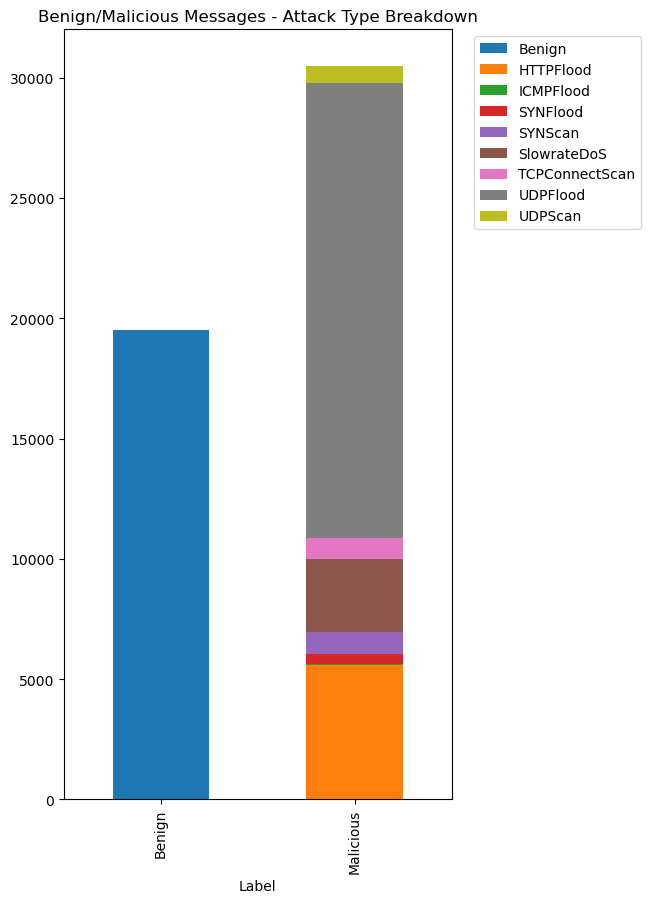

In [29]:
fig,ax = plt.subplots(figsize=(5, 10))
attack_counts = df.groupby(['Label', 'Attack Type']).size()
display(attack_counts.sort_values())
attack_counts.unstack('Attack Type')\
    .plot(kind='bar', stacked=True, ax=ax)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.xaxis.grid(False)
plt.title('Benign/Malicious Messages - Attack Type Breakdown')
plt.savefig('images/benign_malicious_attacktype.png')
plt.show()

Indeed, we do see class imbalances when it comes to Attack Type (classification of malicious attacks). The most noticeable are between:

UDPFlood
UDPScan
TCPConnectScan
SYNScan
SYNFlood


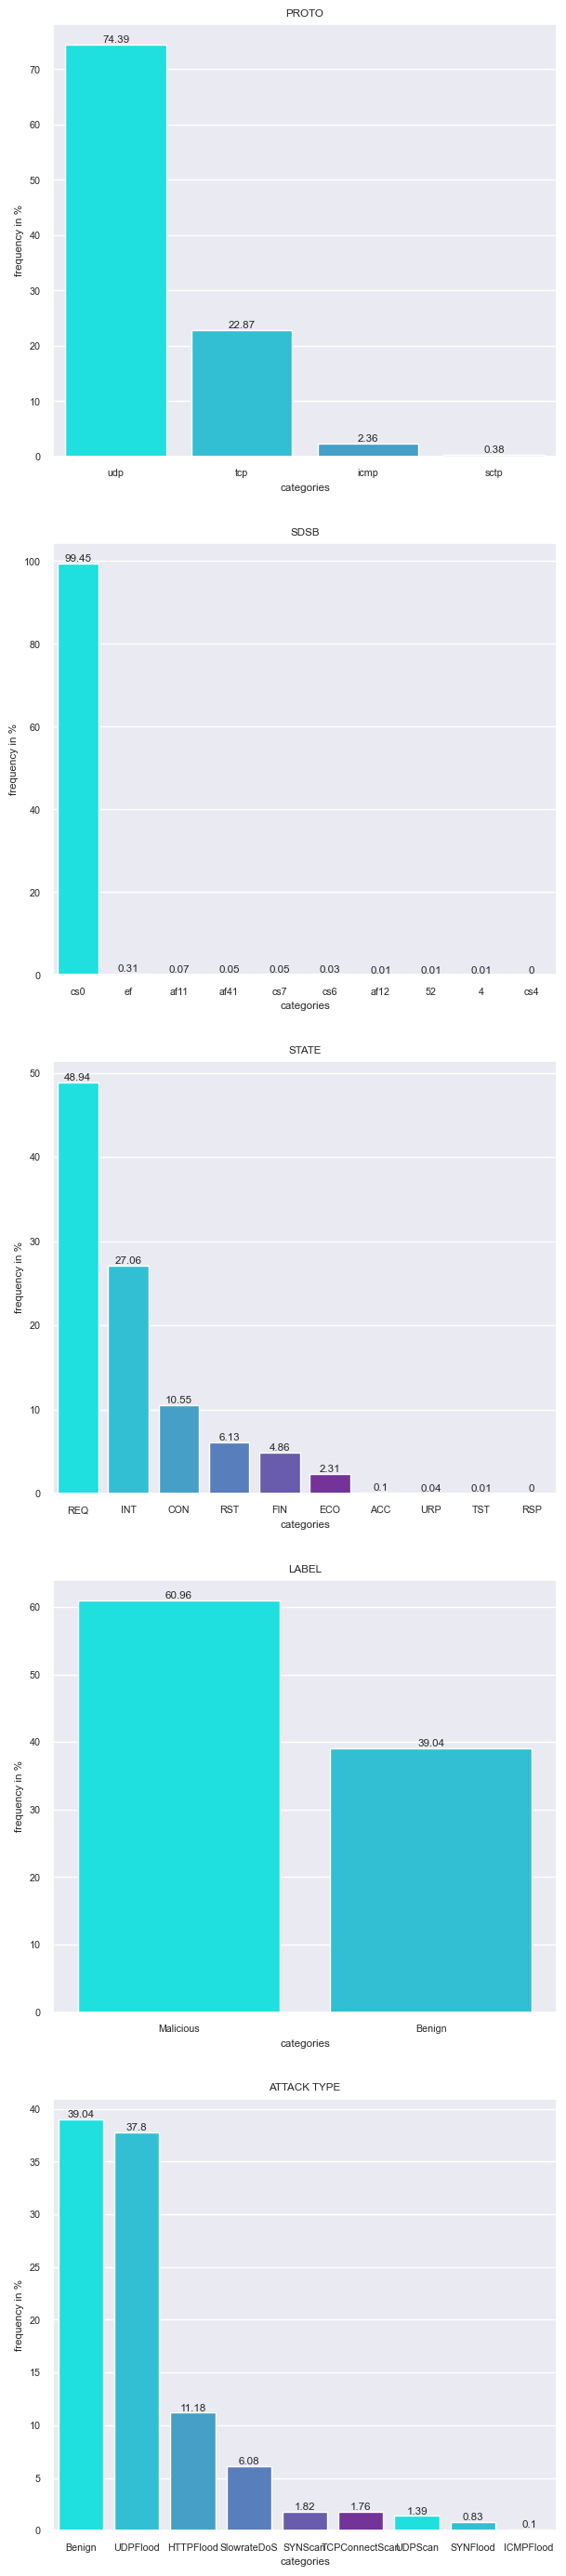

In [30]:
sns.set(style="darkgrid",font_scale=0.7)
col_list = df.select_dtypes(include=['object', 'category']).columns.tolist()
fig, axs = plt.subplots(len(col_list), 1, figsize=(7, 35))
i = 0
for col in col_list:
    category = df[col].value_counts().div(df.shape[0]).mul(100).round(2)
    category_df = category.reset_index()
    category_df.columns = ['categories', 'frequency']
    ax = sns.barplot(x = category_df.categories, y=category_df.frequency, ci=None, palette=sns.color_palette('blend:#0FF,#72A'), ax=axs[i])
    ax.set_title(str(col).upper()) 
    ax.set_ylabel("frequency in %")
    for container in ax.containers:
        ax.bar_label(container)
    i = i + 1

plt.savefig('images/bar_categories.png')
plt.show()
    

#### Indeed, we do see class imbalances when it comes to Attack Type (classification of malicious attacks). The most noticeable are:

- UDPFlood
- UDPScan
- TCPConnectScan
- SYNScan
- SYNFlood
- ICMPFlood

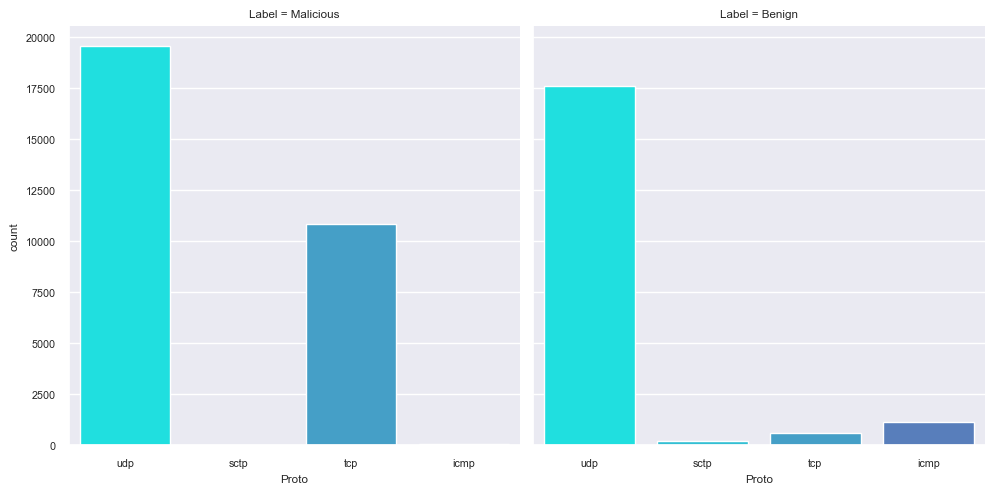

In [31]:
countplots = partial(sns.catplot, data=df, kind='count', col_wrap=3, palette=sns.color_palette('blend:#0FF,#72A'))
countplots(x='Proto', col='Label', col_wrap=2)
plt.savefig('images/proto_benign_malicious.png')
plt.show()

In [32]:
# Lets us compare Benign and Malicious for each category
df_trans =df.copy(deep=True)
df_trans['Label'] = df_trans['Label'].replace({'Benign': 0, 'Malicious': 1})

In [33]:
def plot_cat_func(attr):
    df_proto = pd.merge( df_trans[df_trans['Label']==1].groupby([attr]).size().to_frame(), \
               df_trans[df_trans['Label']==0].groupby([attr]).size().to_frame(), \
                left_on=attr, right_on=attr, how='outer')

    df_tmp = pd.DataFrame(df_proto)
    df_tmp.rename(columns = {'0_x':'Malicious', '0_y':'Benign'}, inplace=True);
    df_tmp.reset_index(inplace=True)
    dfm = pd.melt(df_tmp, id_vars=attr, var_name='Traffic Type', value_name='Count')
    plt.close()
    sns.set(style="darkgrid",font_scale=0.8)
    grid = sns.catplot(x=attr, y='Count', hue='Traffic Type', data=dfm, kind='bar', height=5, aspect=2, \
                       palette=["darkred", "seagreen"])
    ax = grid.axes[0, 0]
    for container in ax.containers:
        ax.bar_label(container)

    plt.xticks(rotation=60) 
    plt.title('\nMalicious Vs Benign Distribution per ' + str(attr) + ' Category');
    plt.savefig('images/' + str(attr) + '_benign_malicious_distribution.png', bbox_inches='tight')
    plt.show()
    plt.close()
    return 

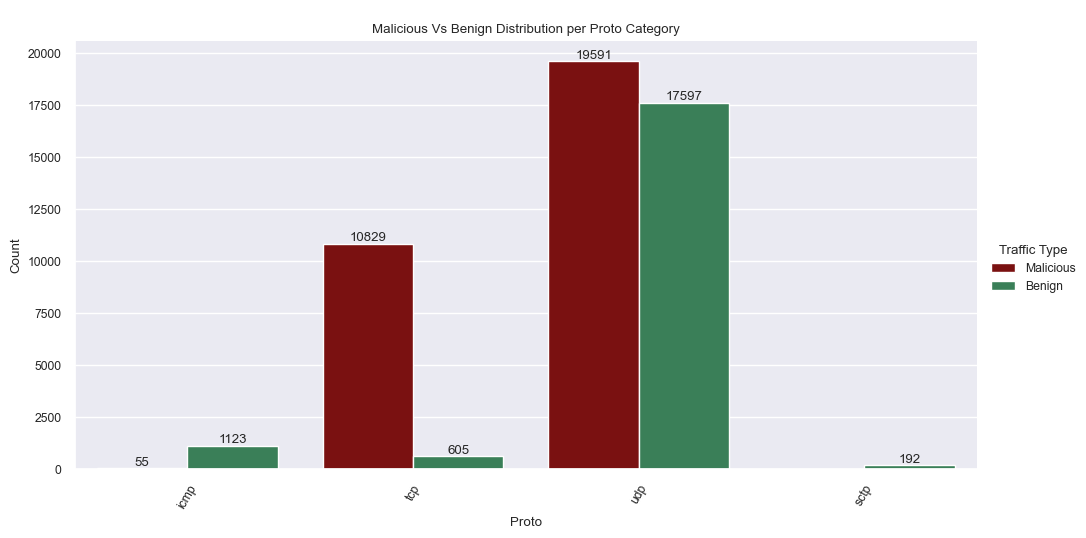

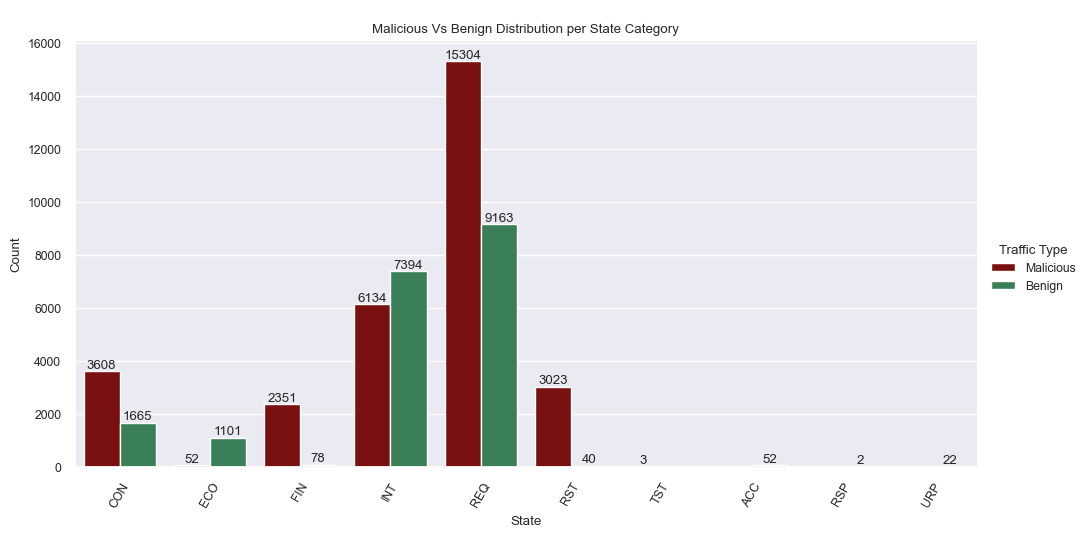

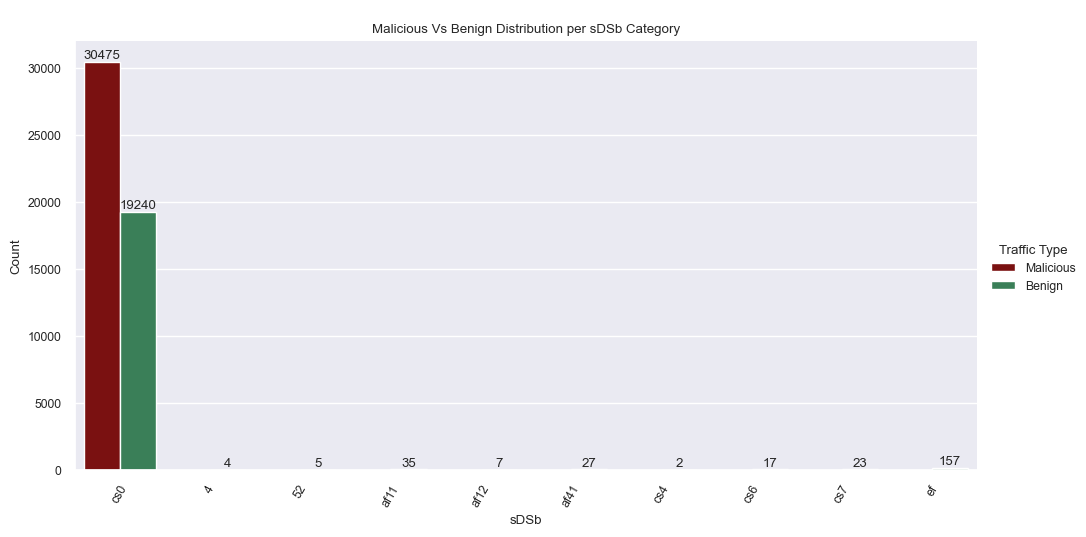

In [34]:

plot_cat_func('Proto')
plot_cat_func('State')
plot_cat_func('sDSb')

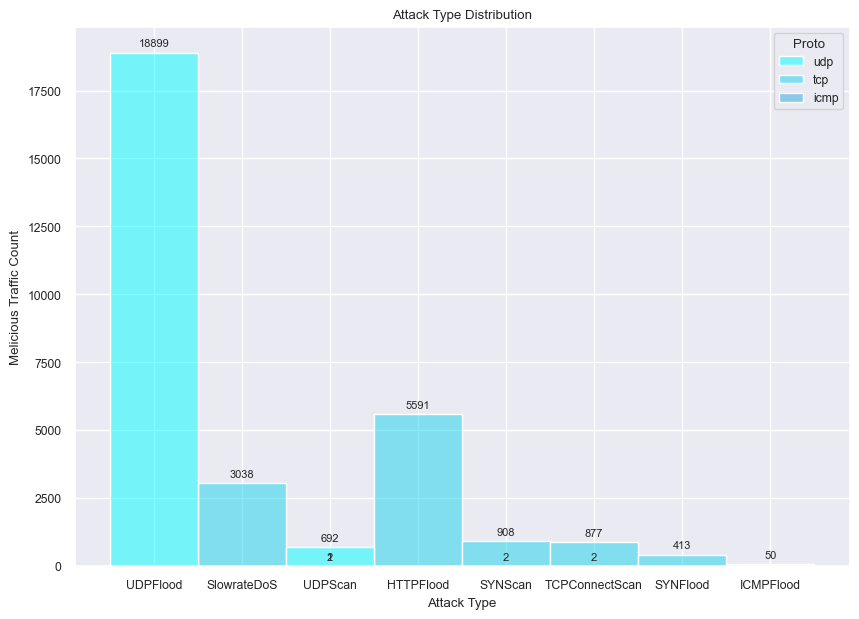

In [35]:
# Drill down to the Attack type level
fig, ax = plt.subplots(figsize=(10, 7))
sns.set(style="darkgrid",font_scale=0.8)
ax = sns.histplot(data=df_trans[df_trans['Label']==1], x='Attack Type', hue='Proto', palette=sns.color_palette('blend:#0FF,#72A'), ax=ax)
ax.set_title("Attack Type Distribution")
ax.set_xlabel("Attack Type")
ax.set_ylabel("Melicious Traffic Count")
for c in ax.containers:
    labels = [f'{h:0}' if (h := v.get_height()) != 0 else '' for v in c ]
    ax.bar_label(c, labels=labels, fontsize=8, padding=3)
plt.savefig('images/attack_type_dist.png', bbox_inches='tight')
plt.show()

#### Drill down on Melicious messages at an Attack Level

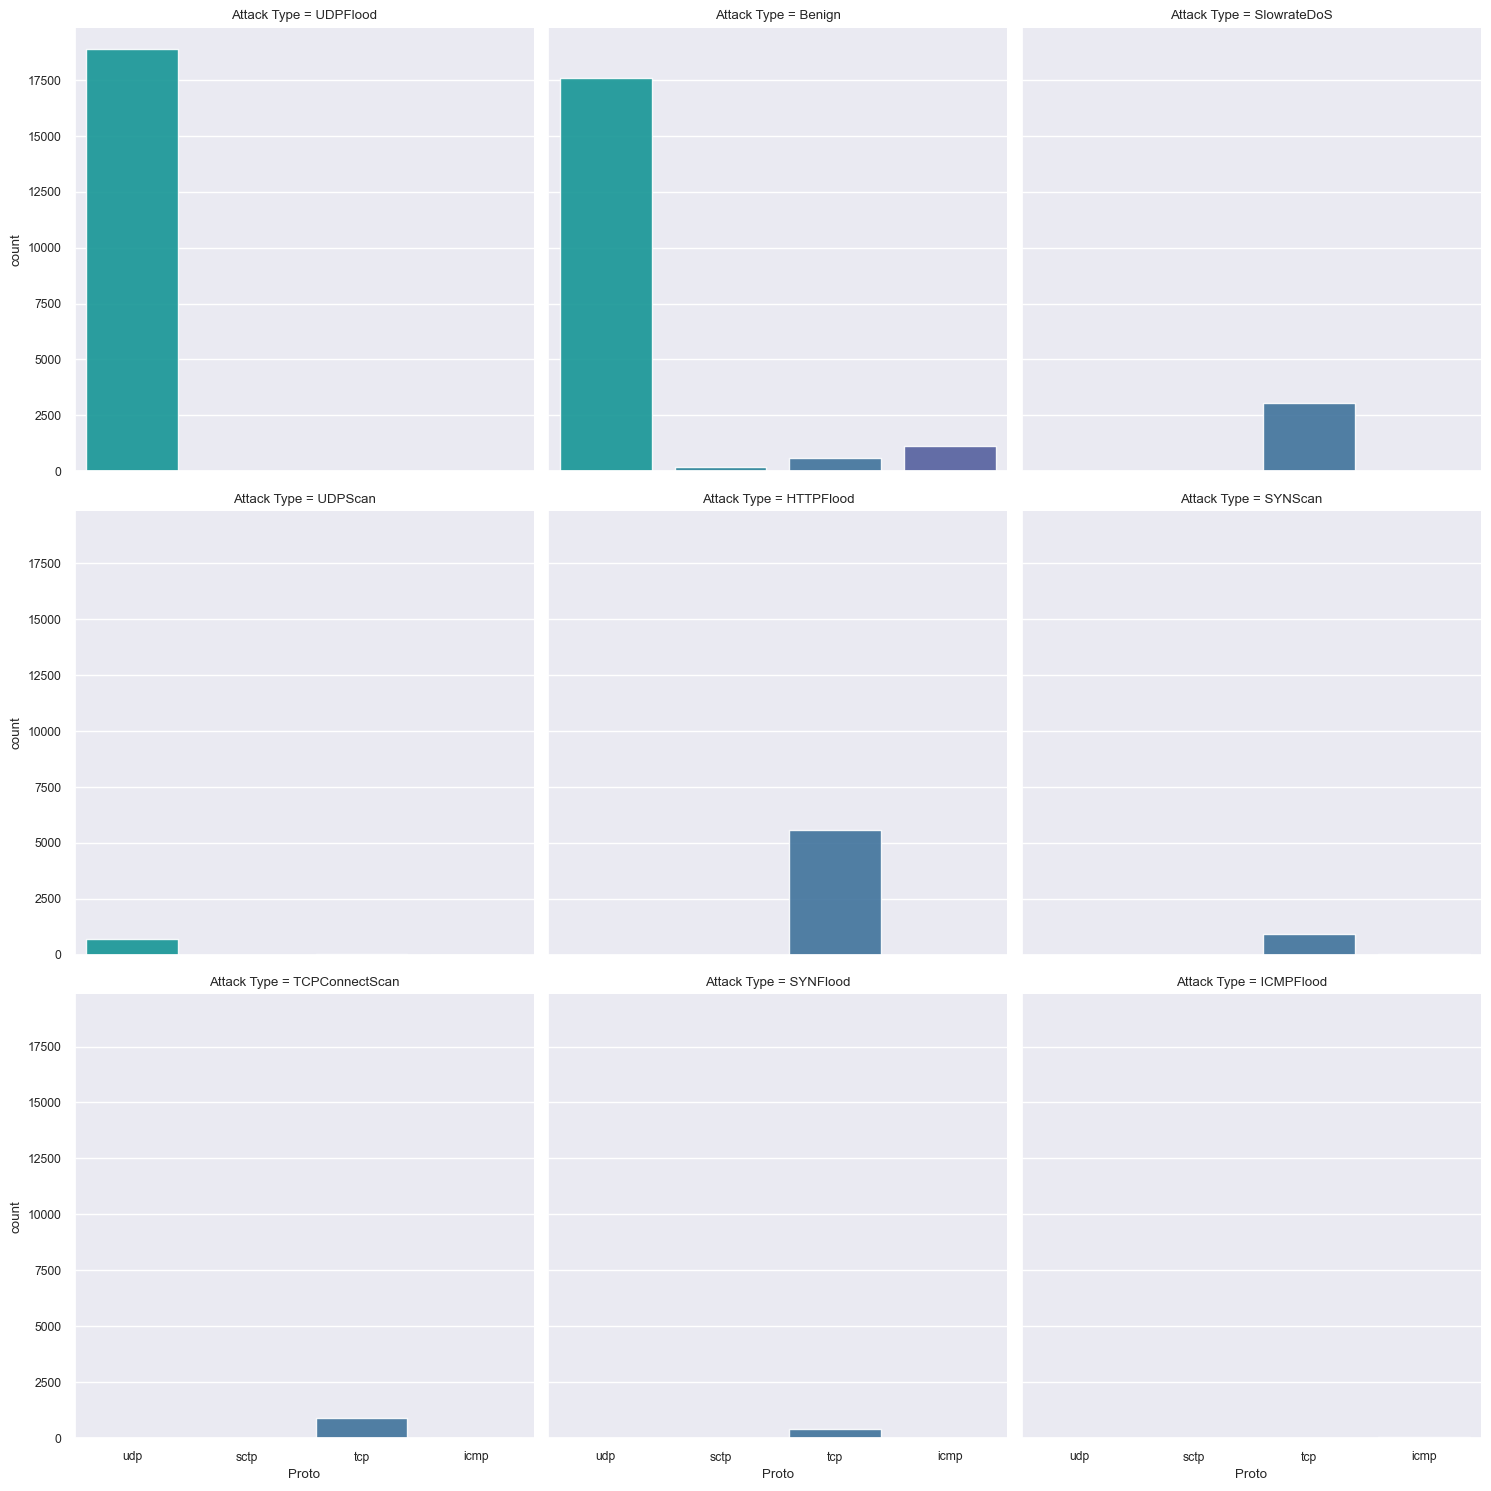

In [36]:
countplots = partial(sns.catplot, data=df, kind='count', col_wrap=3, palette=sns.color_palette('blend:#0AA,#72A'), alpha=0.9)
countplots(x='Proto', col='Attack Type', col_wrap=3)
plt.savefig('images/proto_attacktypes.png',bbox_inches='tight')
plt.show()

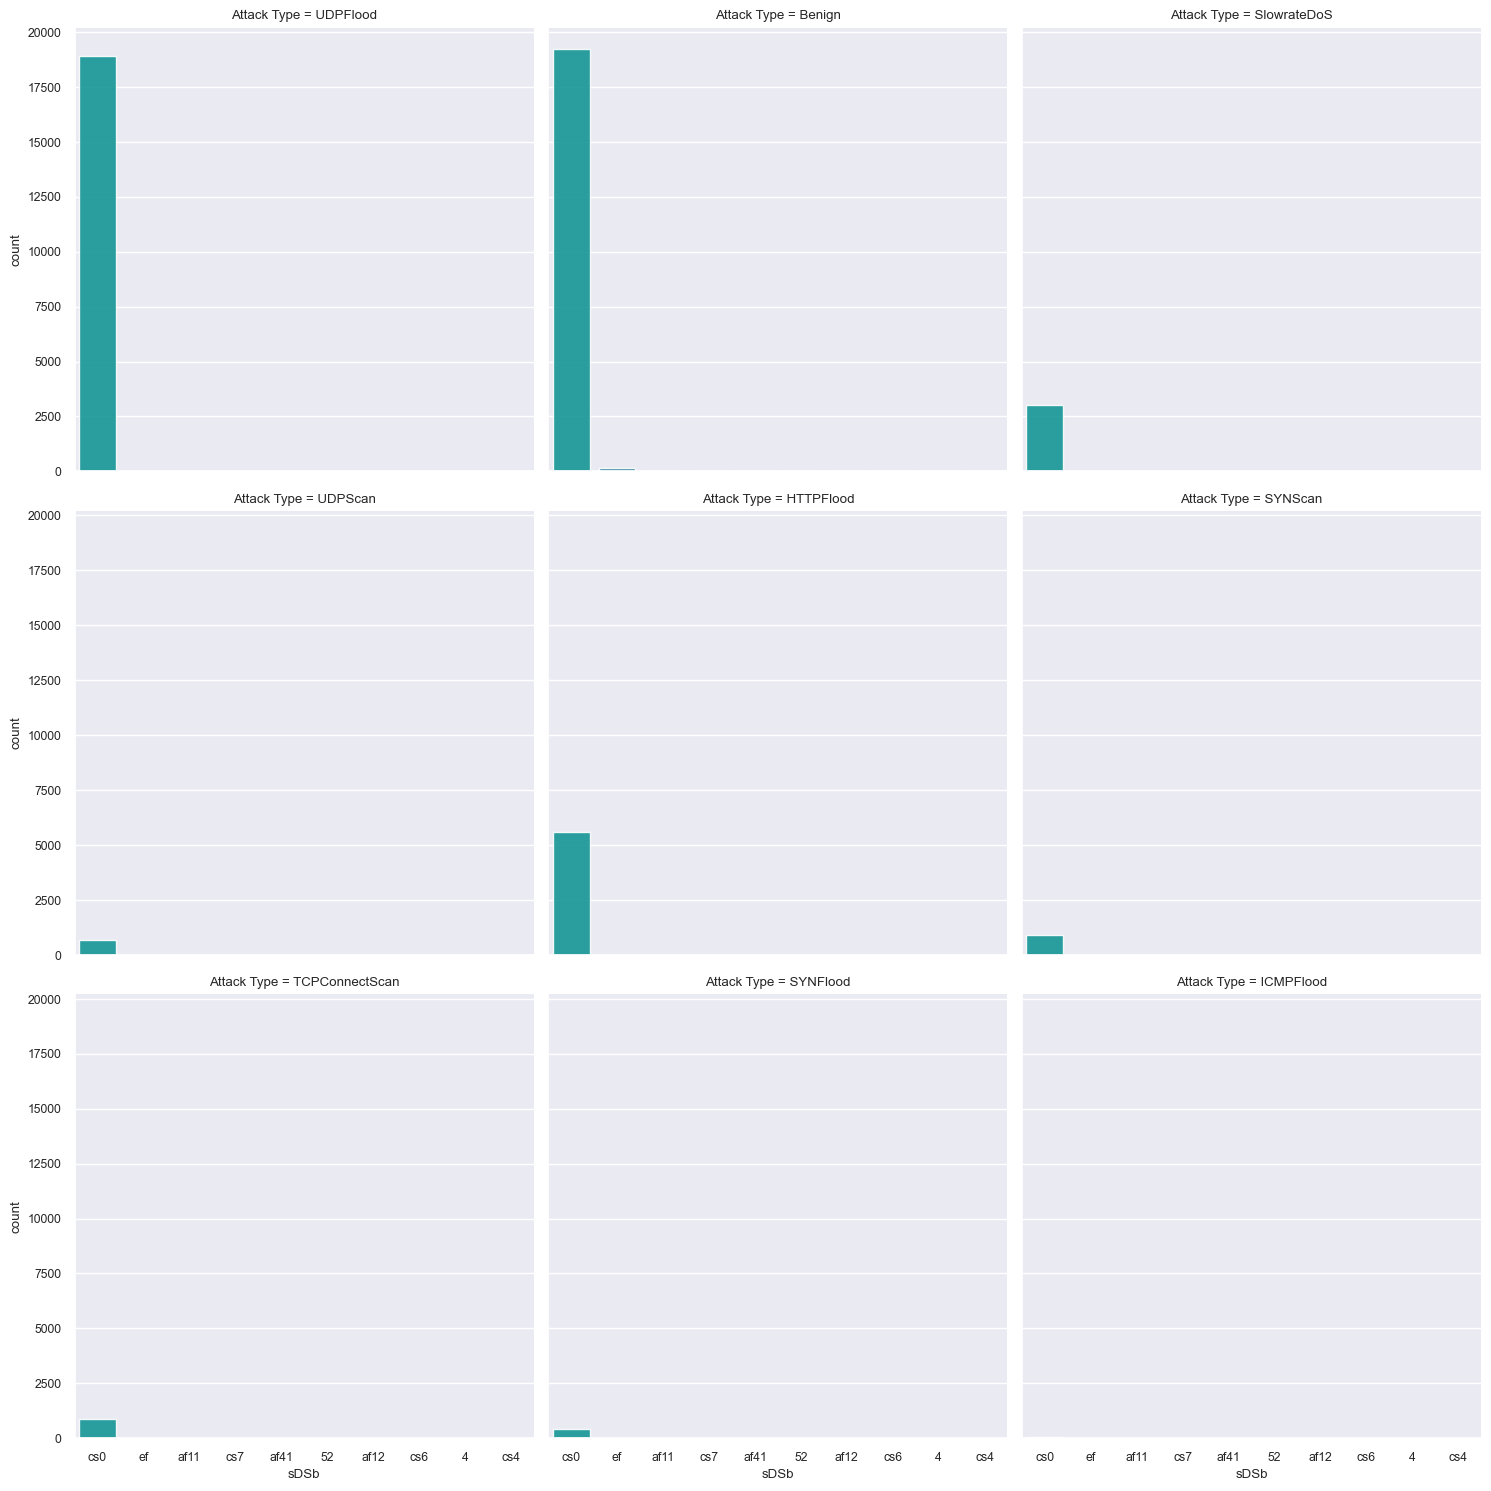

In [37]:
countplots = partial(sns.catplot, data=df, kind='count', col_wrap=3, palette=sns.color_palette('blend:#0AA,#72B'), alpha=0.9)
countplots(x='sDSb', col='Attack Type', col_wrap=3)
plt.savefig('images/sdsb_attacktypes.png',bbox_inches='tight')
plt.show()

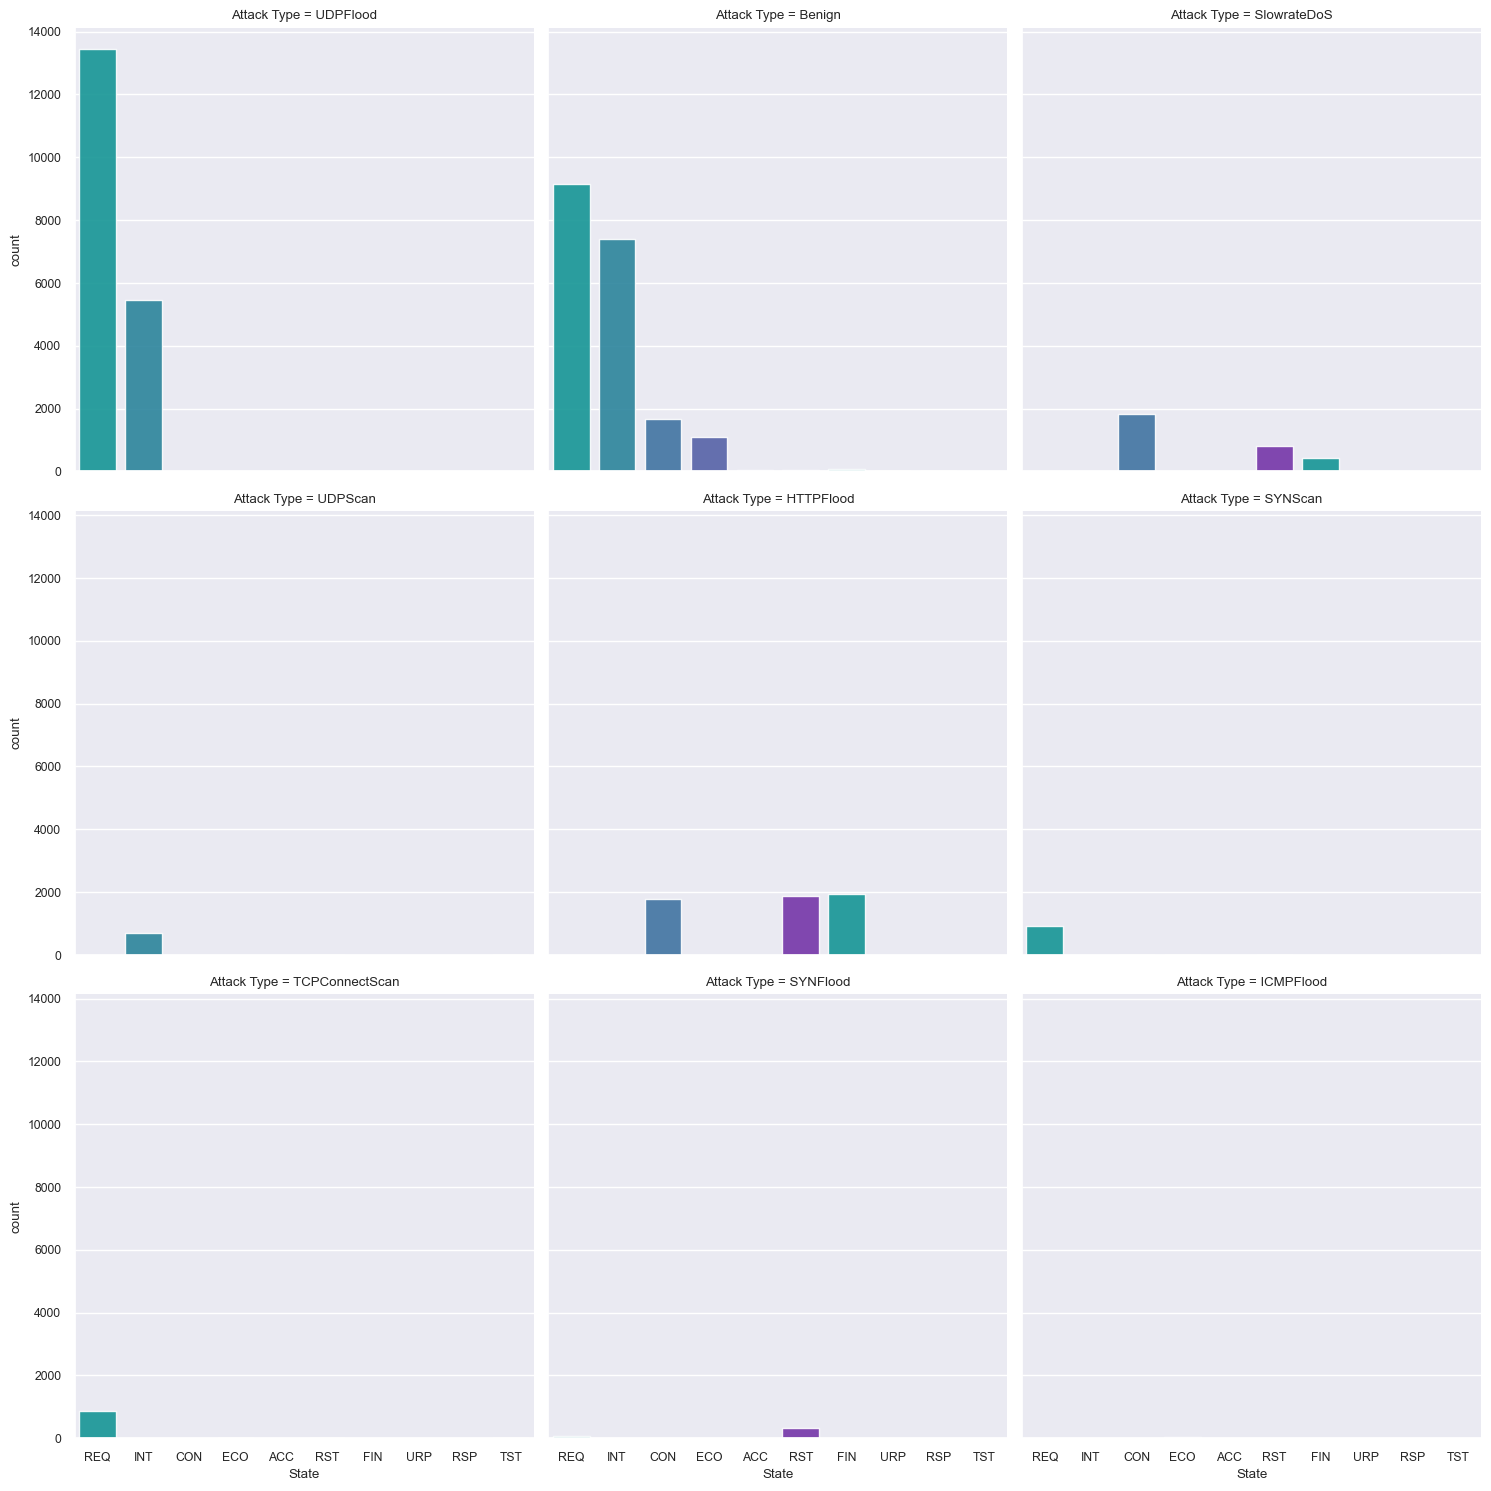

In [38]:
countplots = partial(sns.catplot, data=df, kind='count', col_wrap=3, palette=sns.color_palette('blend:#0AA,#72B'), alpha=0.9)
countplots(x='State', col='Attack Type', col_wrap=3)
plt.savefig('images/state_attacktypes.png', bbox_inches='tight')
plt.show()

### Lets examine the numerical features against Labels

### Understanding the Task & how to proceed
Per the problem statement, we will have two levels of preditions - Label and Attack Type. The classification approach will be as follows:
- Lable will be binary classification
- Attack Type will be multi-class classification using one-versus-one strategy.
- a) Because 'Attack Type' multiclass is what we will predict, ordinal encoder method will be used.
- b) Rest of categorical features will be encoded using OneHot encoding
- c) Multi-collinearity will be addressed by dropping features with correlation above 70%
- d) The 'Attack Tool' features will be dropped since it is captured in the 'Attack Type'. Additionally, 'Attack Tool' is not relevent to our problem statement.
    

### Starting with examining the numerical features and identify the ones that can be dropped

In [39]:
# The 'Attack Tool' features will be dropped since the the former captured in the 'Attack Type' and 'Attack Tool' is not relevent to our problem statement.

#Ordinal encoder
dict = {'Benign': 0, 'UDPFlood': 1, 'HTTPFlood': 2, 'SlowrateDoS': 3, 'TCPConnectScan': 4, 'SYNScan': 5, 'UDPScan': 6, 'SYNFlood': 7, 'ICMPFlood': 8}

# Continue uding df_trans since 'Label' is already transformed to numerical
df_trans.replace({'Attack Type':dict},inplace=True);


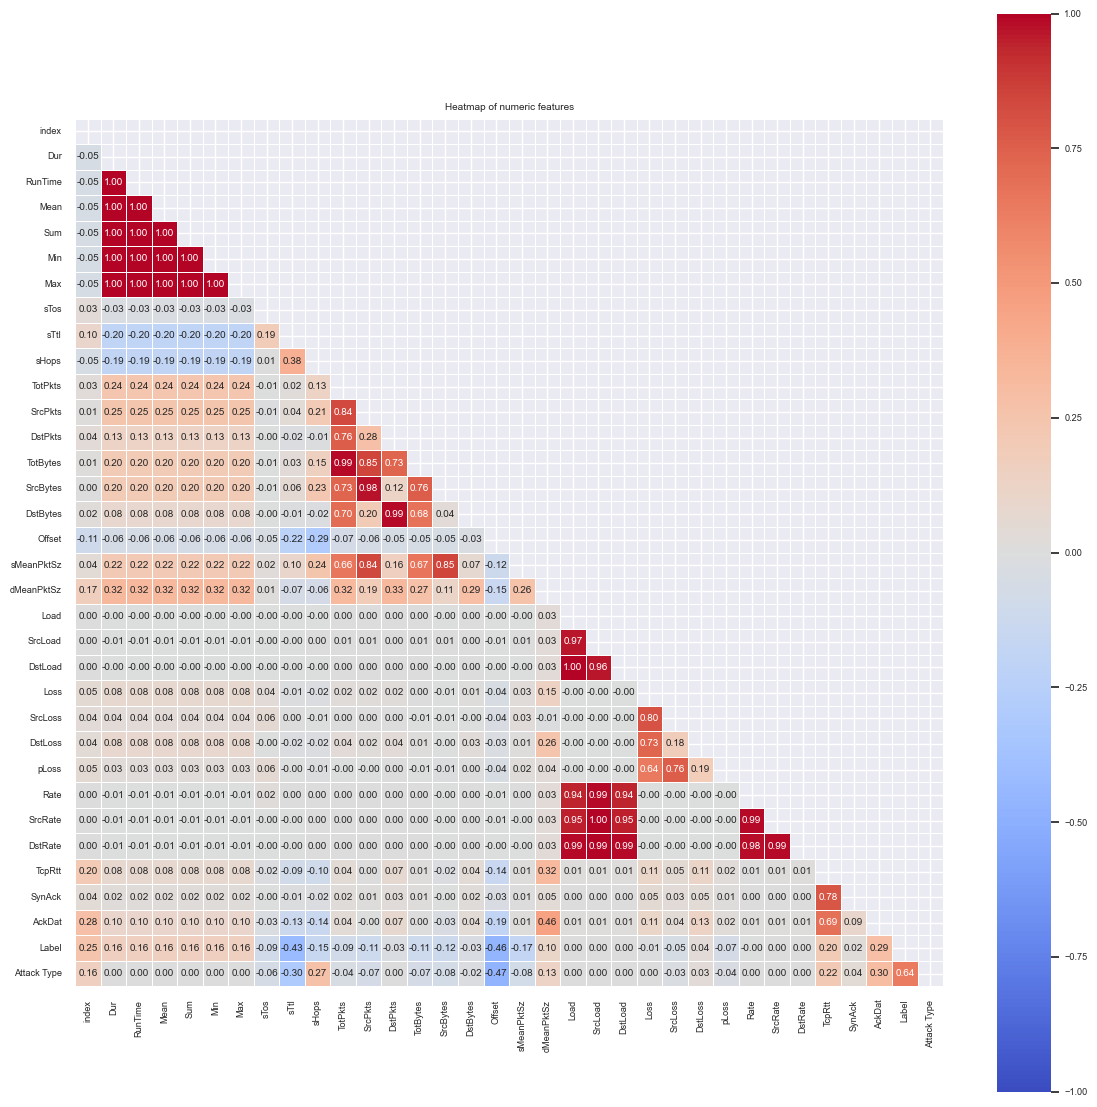

In [40]:
plt.figure(figsize = (14,14))
plt.rcParams.update({'font.size': 6})
numeric_corr = df_trans.corr(numeric_only=True)
sns.set(style="darkgrid",font_scale=0.6)
mask = np.triu(np.ones_like(numeric_corr, dtype=bool))
sns.heatmap(numeric_corr, cmap="coolwarm", vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.title("Heatmap of numeric features")
plt.savefig('images/heatmap_identify_relevent_features.png', bbox_inches='tight')
plt.show()

Most contributing features to the Label and Attack Type are:
Offset,
sTtt,
AckDat and
TcpRtt


In [41]:
sns.reset_orig() 
plt.close()
plt.clf()

In [42]:
#Multi-collinearity will be addressed by dropping features with correlation above 70%
numerical_columns = df_trans.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_trans[numerical_columns].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than a user set value 0.80
TO_DROP = [column for column in upper.columns if any(upper[column] > 0.80)]
print("Features to Drop:",TO_DROP)

df_trans.drop(TO_DROP, axis=1, inplace=True)


Features to Drop: ['RunTime', 'Mean', 'Sum', 'Min', 'Max', 'SrcPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 'sMeanPktSz', 'SrcLoad', 'DstLoad', 'SrcLoss', 'Rate', 'SrcRate', 'DstRate']


In [43]:
# Lets examine the numerical features against 'Label' & 'Attack Type'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numb = df[numerical_columns].copy(deep=True)
df_numb.drop(TO_DROP, axis=1, inplace=True)

In [44]:
#Label
df_numb['Label'] = df['Label']
sns.reset_orig() 
plt.close()
plt.clf()
sns.set_style('whitegrid')
sns_plot = sns.pairplot(df_numb, hue='Label', diag_kind='kde', corner=True, palette = {'darkred','seagreen'})
sns_plot.savefig("images/pairplot_numeric_features_label.png")
plt.clf()

In [45]:
sns.reset_orig() 
plt.close()
plt.clf()

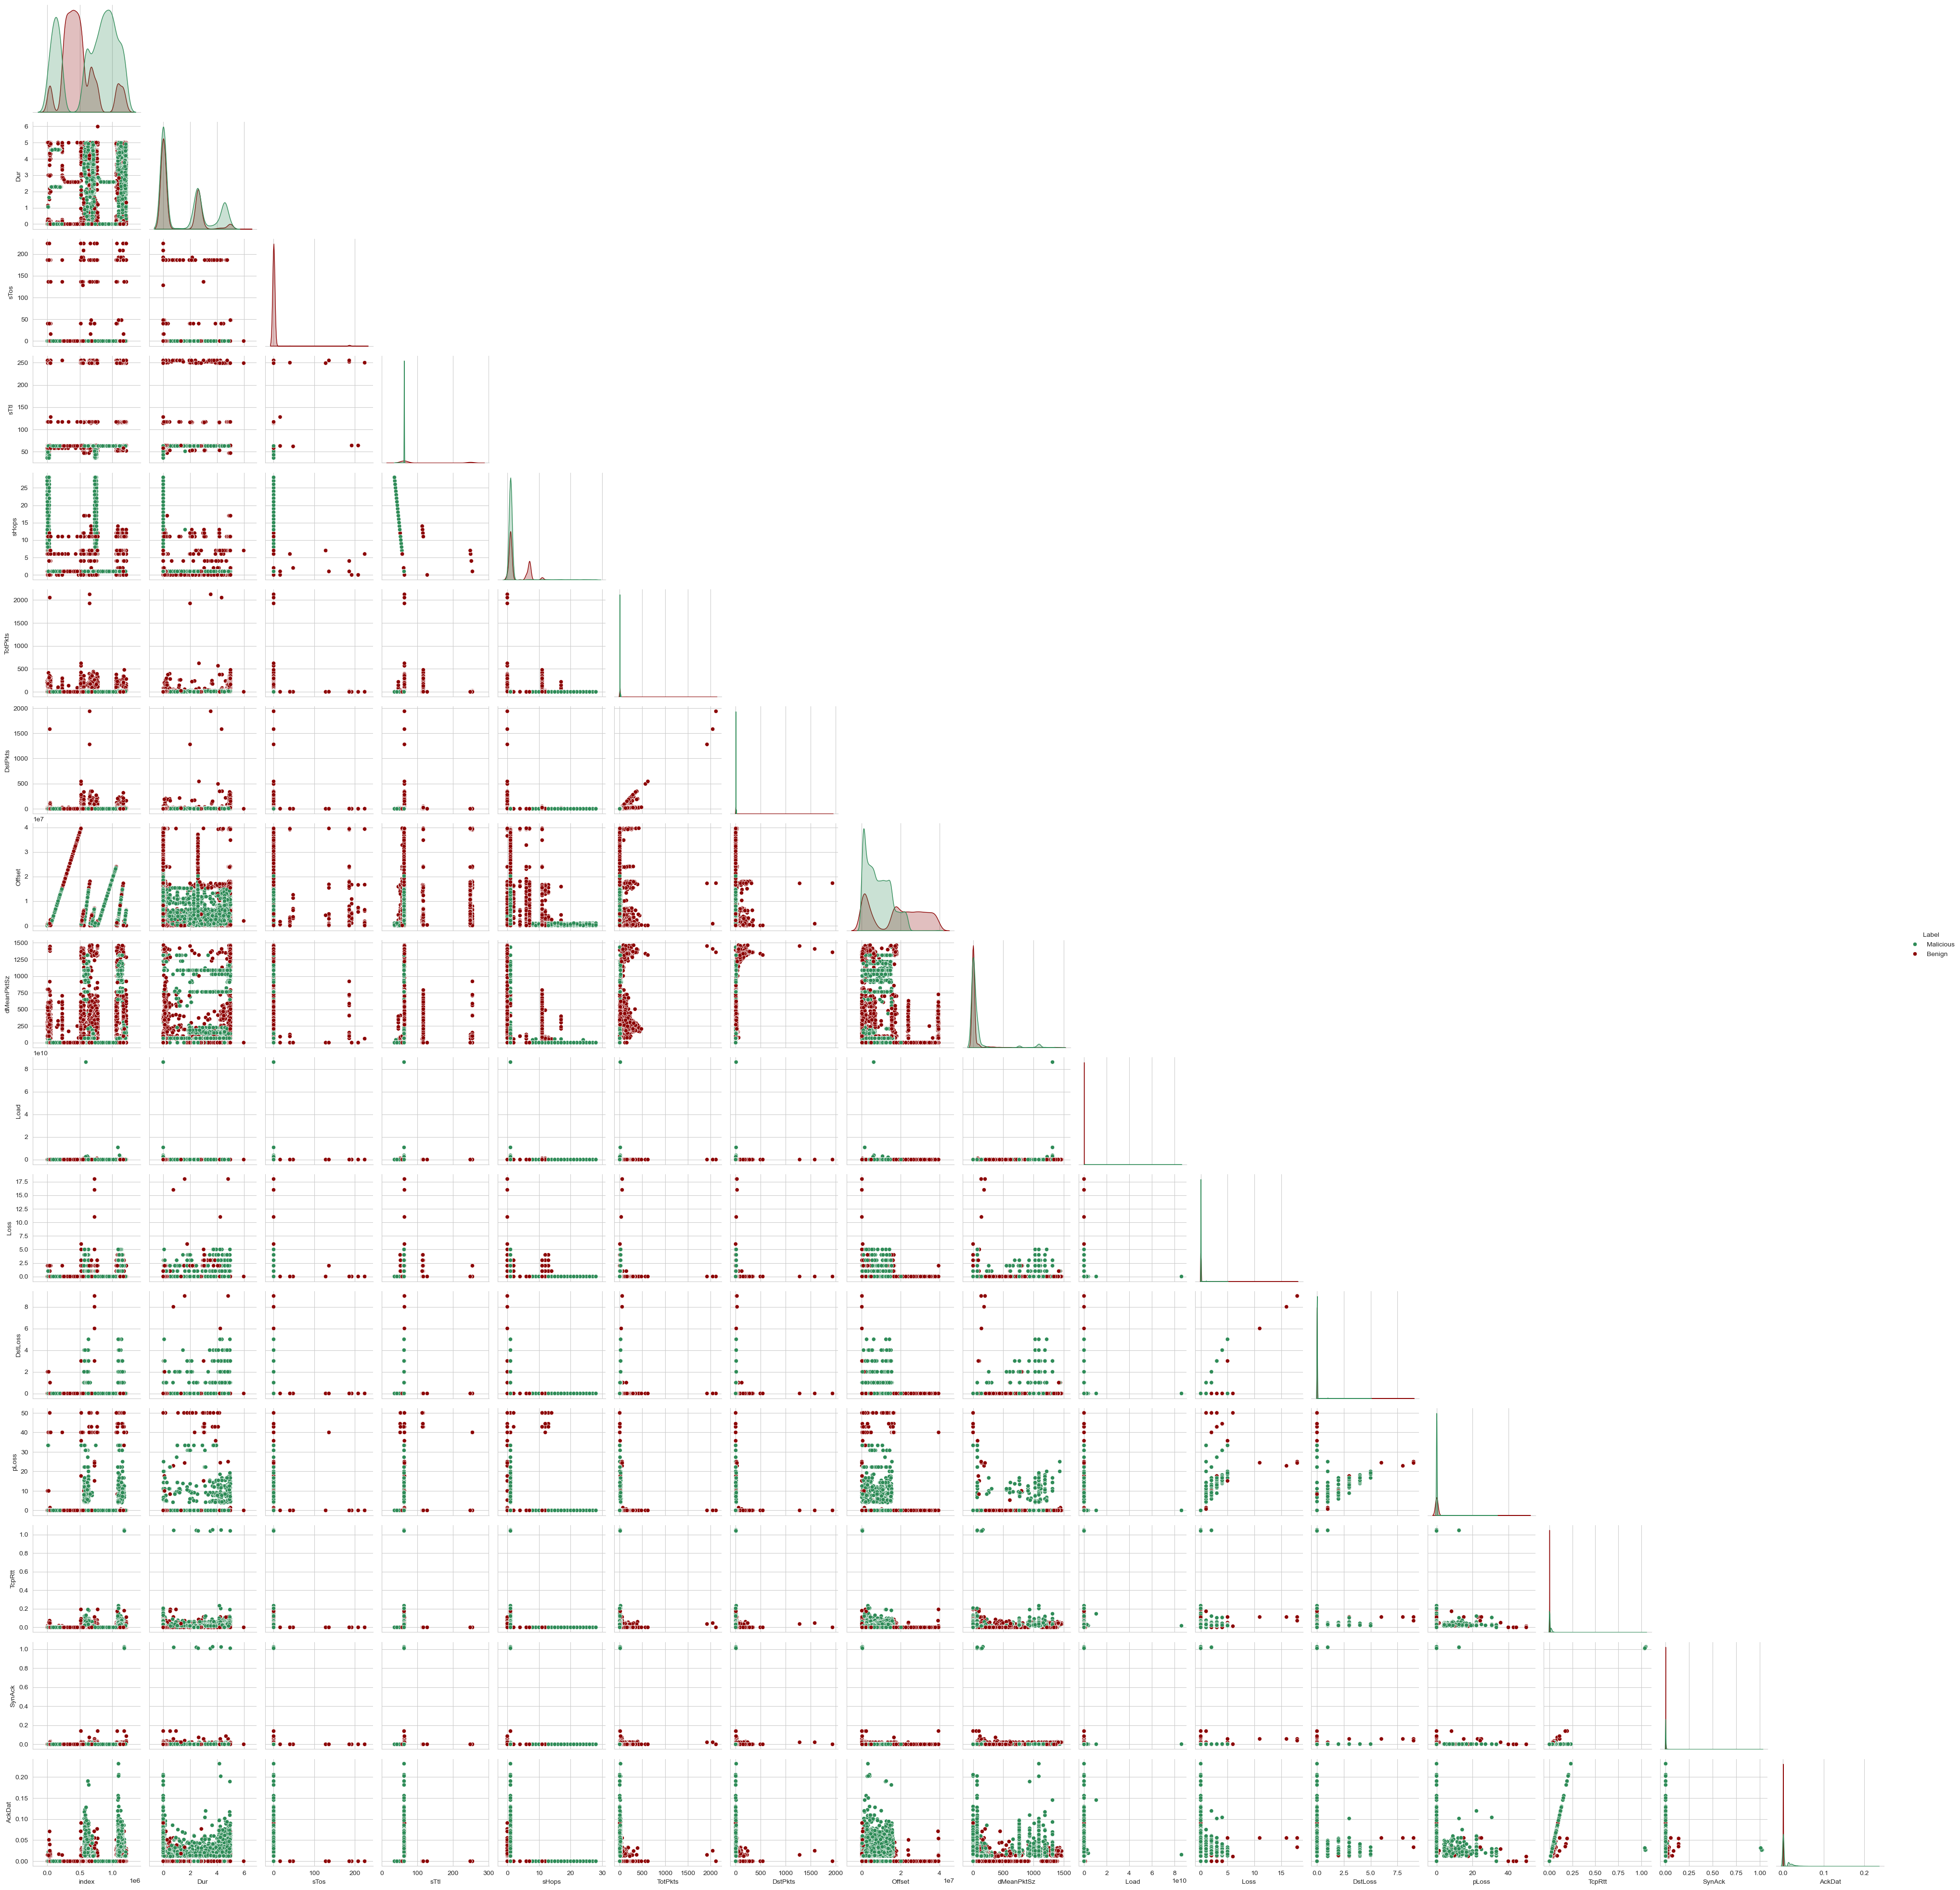

In [46]:
from IPython.display import Image
Image(filename='images/pairplot_numeric_features_label.png') 

In [47]:
#Attack Type
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_tmp = df[numerical_columns].copy(deep=True)
df_tmp['Attack Type'] = df['Attack Type']
df_numb = df_tmp[(df_tmp['Attack Type'] != 'Benign')].copy(deep=True)
df_numb.drop(TO_DROP, axis=1, inplace=True)

In [48]:
sns.reset_orig() 
plt.close()
plt.clf()
sns.set_style('whitegrid')
sns_plot = sns.pairplot(df_numb, hue='Attack Type', diag_kind='kde', corner=True, palette='CMRmap')
sns_plot.savefig("images/pairplot_numeric_features_attack_type.png")
plt.clf()

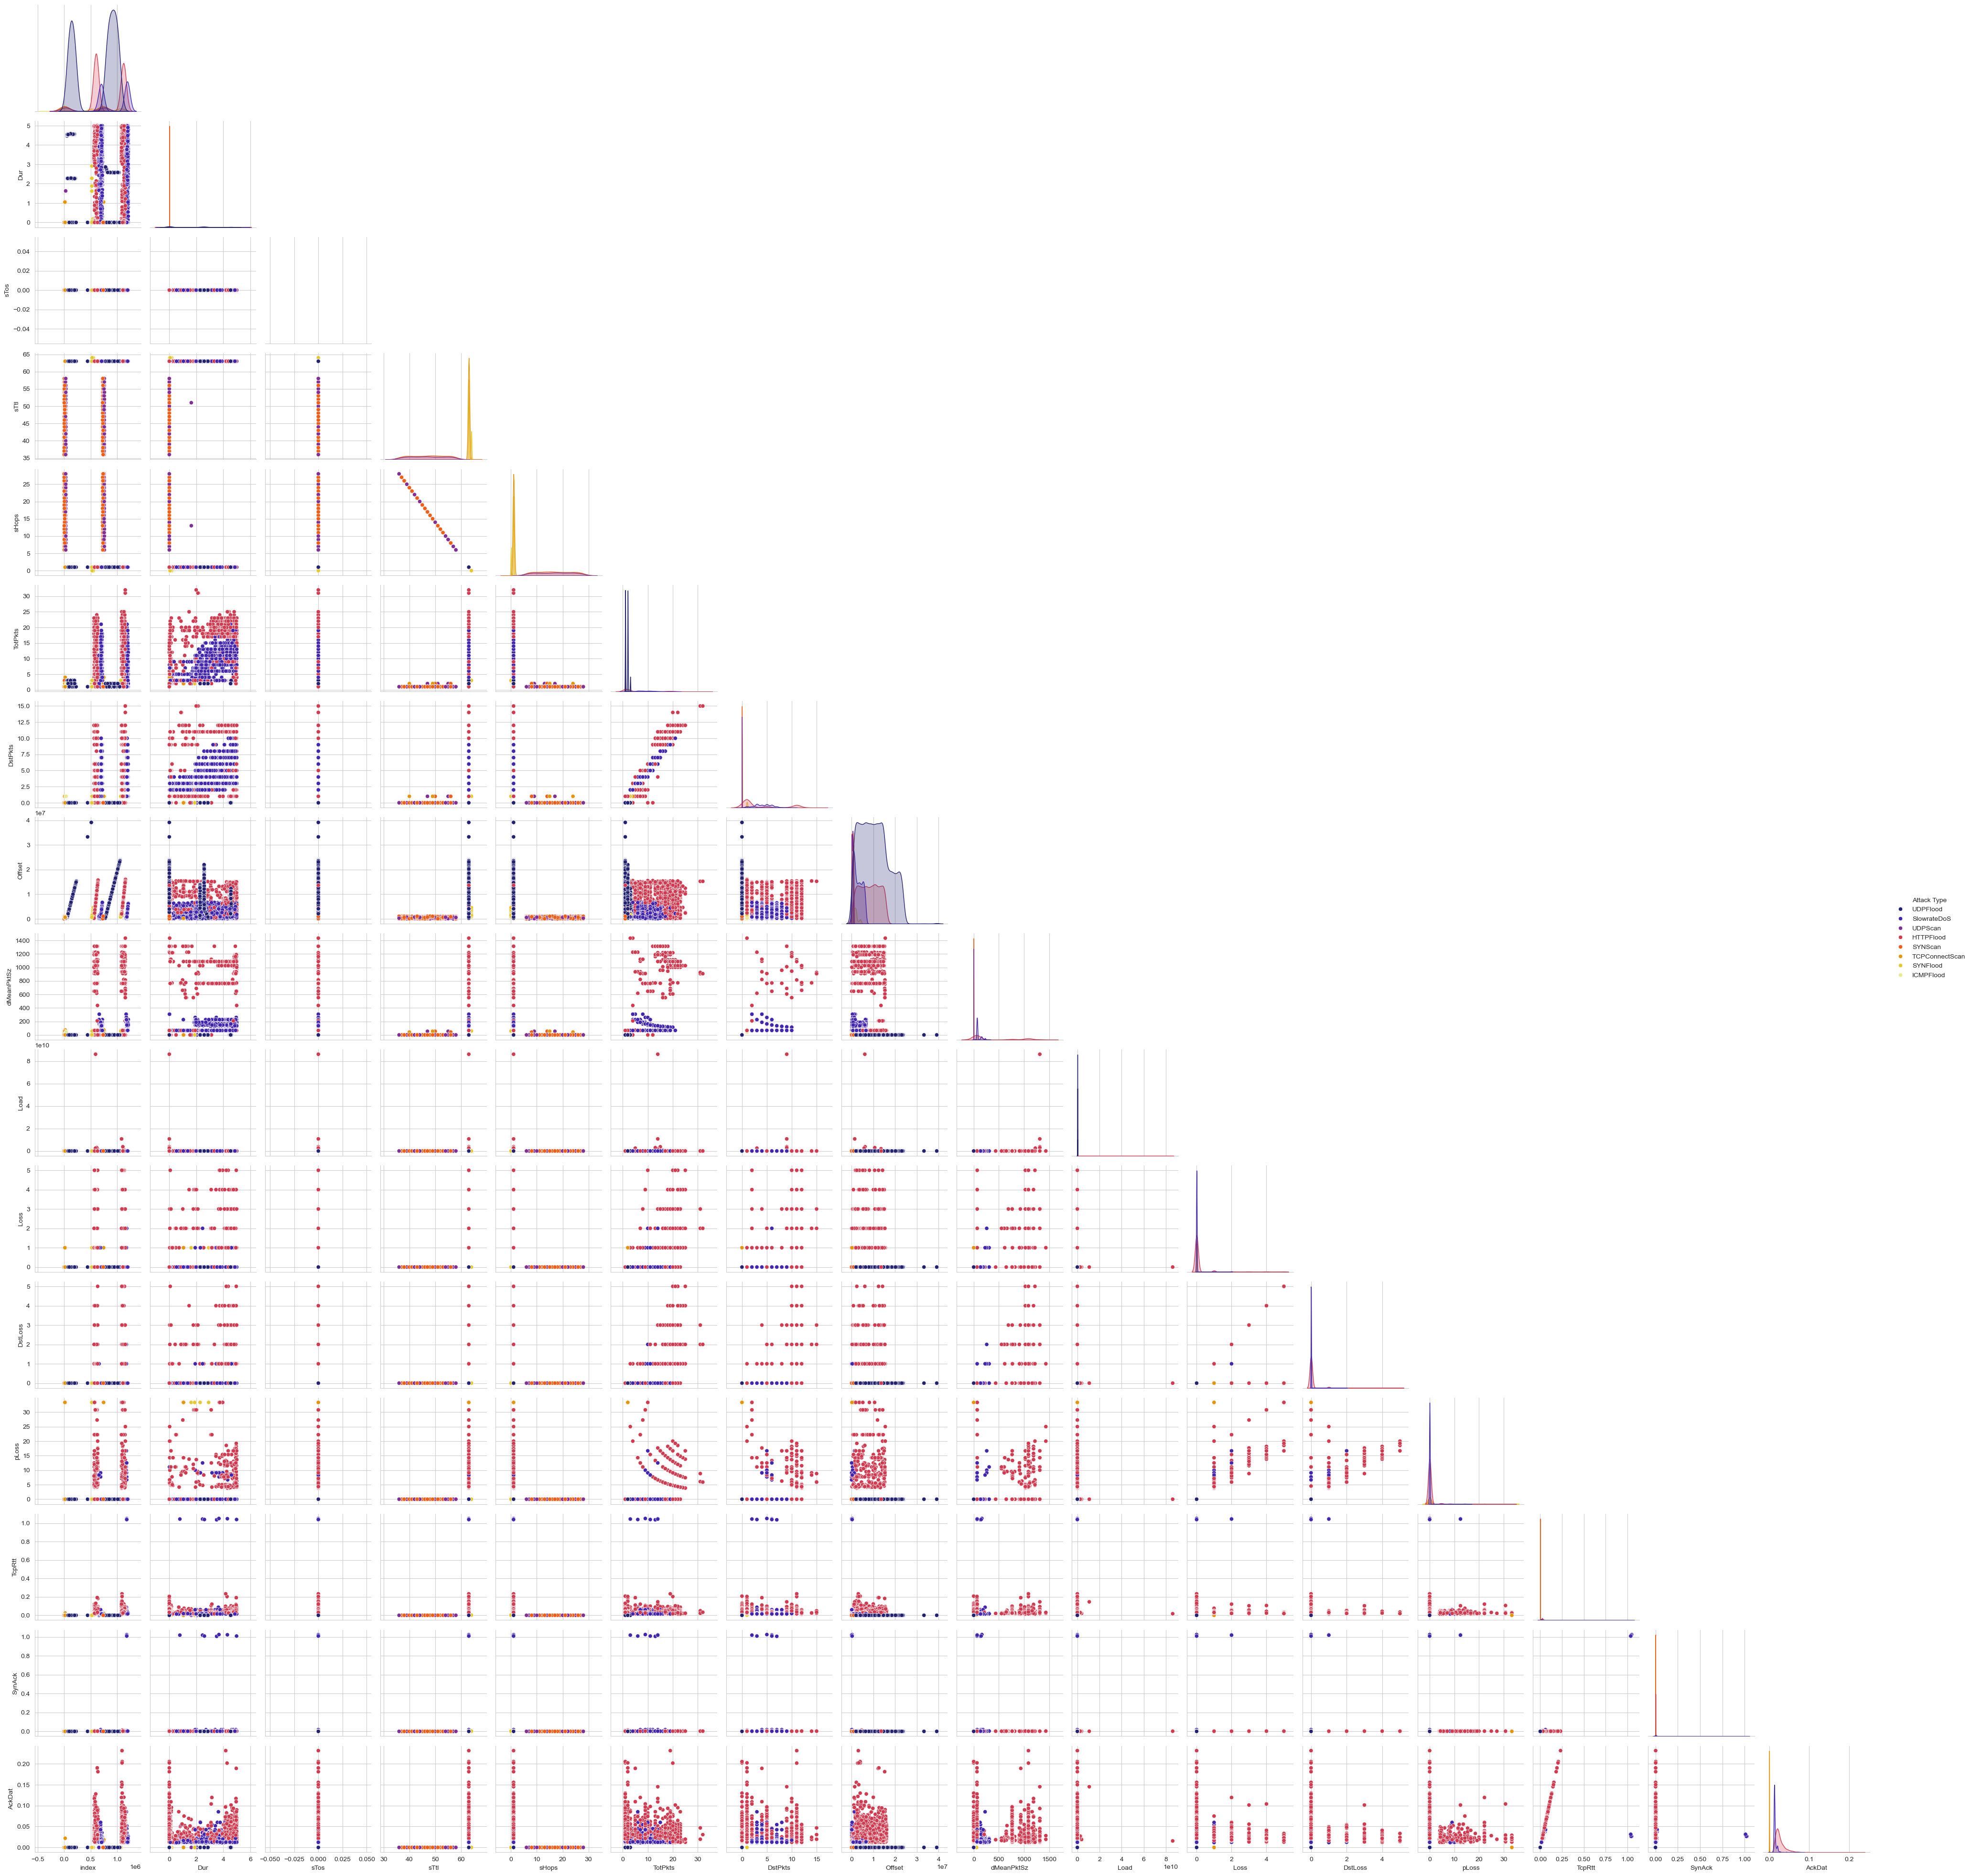

In [49]:
Image(filename='images/pairplot_numeric_features_attack_type.png') 

In [50]:
sns.reset_orig() 
plt.close()
plt.clf()

### Engineering Features

Per the business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data and repare the features and target column for modeling with appropriate encoding and transformations.

In [51]:
#OneHotEncoding
categorical_columns = df_trans.select_dtypes(include=['object', 'category']).columns

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df_trans[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns)).reset_index()
tmp_data = df_trans.drop(categorical_columns, axis=1).reset_index()
clean_df = pd.concat([tmp_data, one_hot_df], axis=1)
clean_df.drop('index', axis=1, inplace=True)
clean_df.head()

level_0       Dur  sTos   sTtl  sHops  TotPkts  DstPkts    Offset  \
0        0  0.000000   0.0   63.0    1.0        1        0   8419356   
1        1  2.578405   0.0   63.0    1.0        2        0   7311480   
2        2  0.000000   0.0   63.0    1.0        1        0  13381224   
3        3  4.455998   0.0  249.0    7.0        2        0  16951584   
4        4  0.000000   0.0   63.0    1.0        1        0  22895580   

   dMeanPktSz        Load  Loss  DstLoss  pLoss  TcpRtt  SynAck  AckDat  \
0         0.0    0.000000     0        0    0.0     0.0     0.0     0.0   
1         0.0  130.313126     0        0    0.0     0.0     0.0     0.0   
2         0.0    0.000000     0        0    0.0     0.0     0.0     0.0   
3         0.0  132.854645     0        0    0.0     0.0     0.0     0.0   
4         0.0    0.000000     0        0    0.0     0.0     0.0     0.0   

   Label  Attack Type  Proto_icmp  Proto_sctp  Proto_tcp  Proto_udp  sDSb_4  \
0      1            1         0.0         0.0        0.0        1.0     0.0   
1      1            1         0.0         0.0        0.0        1.0     0.0   
2      1            1         0.0         0.0        0.0        1.0     0.0   
3      0            0         0.0         0.0        0.0        1.0     0.0   
4      1            1         0.0         0.0        0.0        1.0     0.0   

   sDSb_52  sDSb_af11  sDSb_af12  sDSb_af41  sDSb_cs0  sDSb_cs4  sDSb_cs6  \
0      0.0        0.0        0.0        0.0       1.0       0.0       0.0   
1      0.0        0.0        0.0        0.0       1.0       0.0       0.0   
2      0.0        0.0        0.0        0.0       1.0       0.0       0.0   
3      0.0        0.0        0.0        0.0       1.0       0.0       0.0   
4      0.0        0.0        0.0        0.0       1.0       0.0       0.0   

   sDSb_cs7  sDSb_ef  State_ACC  State_CON  State_ECO  State_FIN  State_INT  \
0       0.0      0.0        0.0        0.0        0.0        0.0        0.0   
1       0.0      0.0        0.0        0.0        0.0        0.0        0.0   
2       0.0      0.0        0.0        0.0        0.0        0.0        0.0   
3       0.0      0.0        0.0        0.0        0.0        0.0        1.0   
4       0.0      0.0        0.0        0.0        0.0        0.0        0.0   

   State_REQ  State_RSP  State_RST  State_TST  State_URP  
0        1.0        0.0        0.0        0.0        0.0  
1        1.0        0.0        0.0        0.0        0.0  
2        1.0        0.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0        0.0  
4        1.0        0.0        0.0        0.0        0.0

<Figure size 640x480 with 0 Axes>

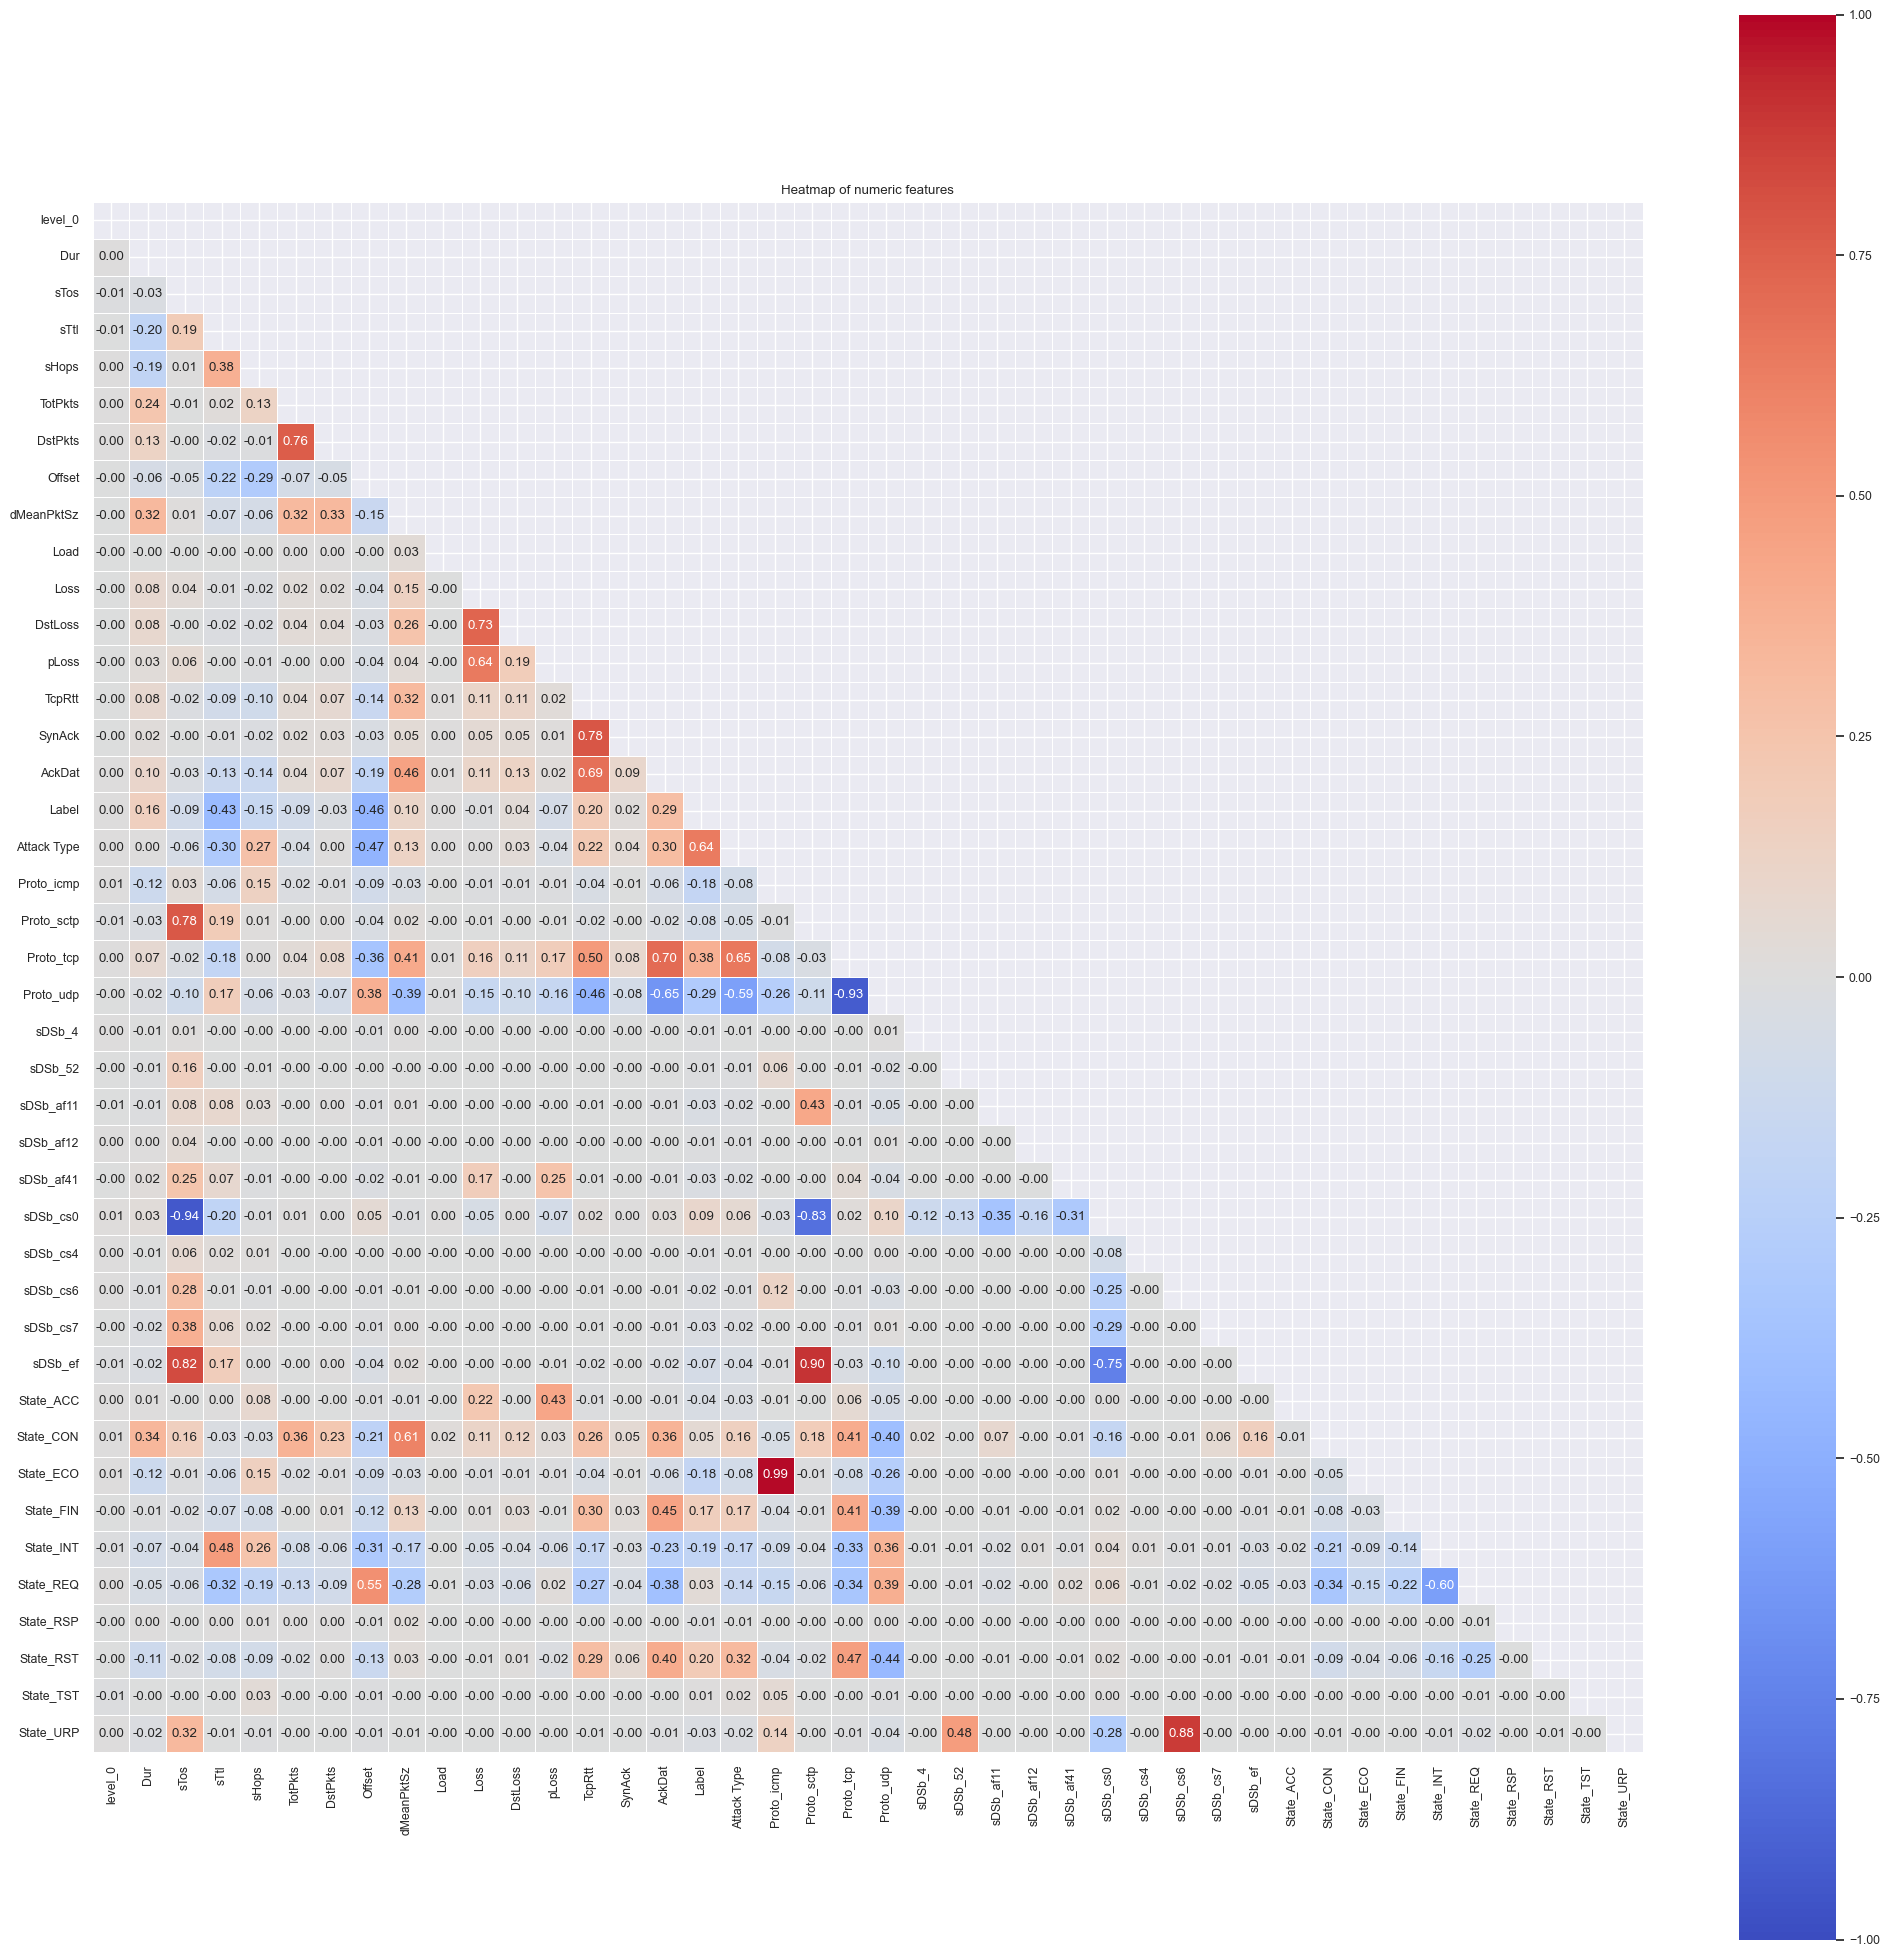

In [52]:
plt.figure(figsize = (25,25))
plt.rcParams.update({'font.size': 8})
numeric_corr = clean_df.corr(numeric_only=True)
sns.set(style="darkgrid",font_scale=0.8)
mask = np.triu(np.ones_like(numeric_corr, dtype=bool))
sns.heatmap(numeric_corr, cmap="coolwarm", vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.title("Heatmap of numeric features")
plt.savefig('images/heatmap_numeric_features_encoded.png', bbox_inches='tight')
plt.show()
plt.close()
plt.clf()

In [53]:
sns.reset_orig() 
plt.close()
plt.clf()

In [54]:
numerical_columns = clean_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = clean_df[numerical_columns].corr().abs()

   
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


# Find index of feature columns with correlation greater than a user set value 0.80
TO_DROP = [column for column in upper.columns if any(upper[column] > 0.80)]
print("Features to Drop:",TO_DROP)

#clean_df.drop(TO_DROP, axis=1, inplace=True)

Features to Drop: ['Proto_udp', 'sDSb_cs0', 'sDSb_ef', 'State_ECO', 'State_URP']


In [55]:
Will_Drop = TO_DROP
clean_df.drop(Will_Drop, axis=1, inplace=True)

<Figure size 640x480 with 0 Axes>

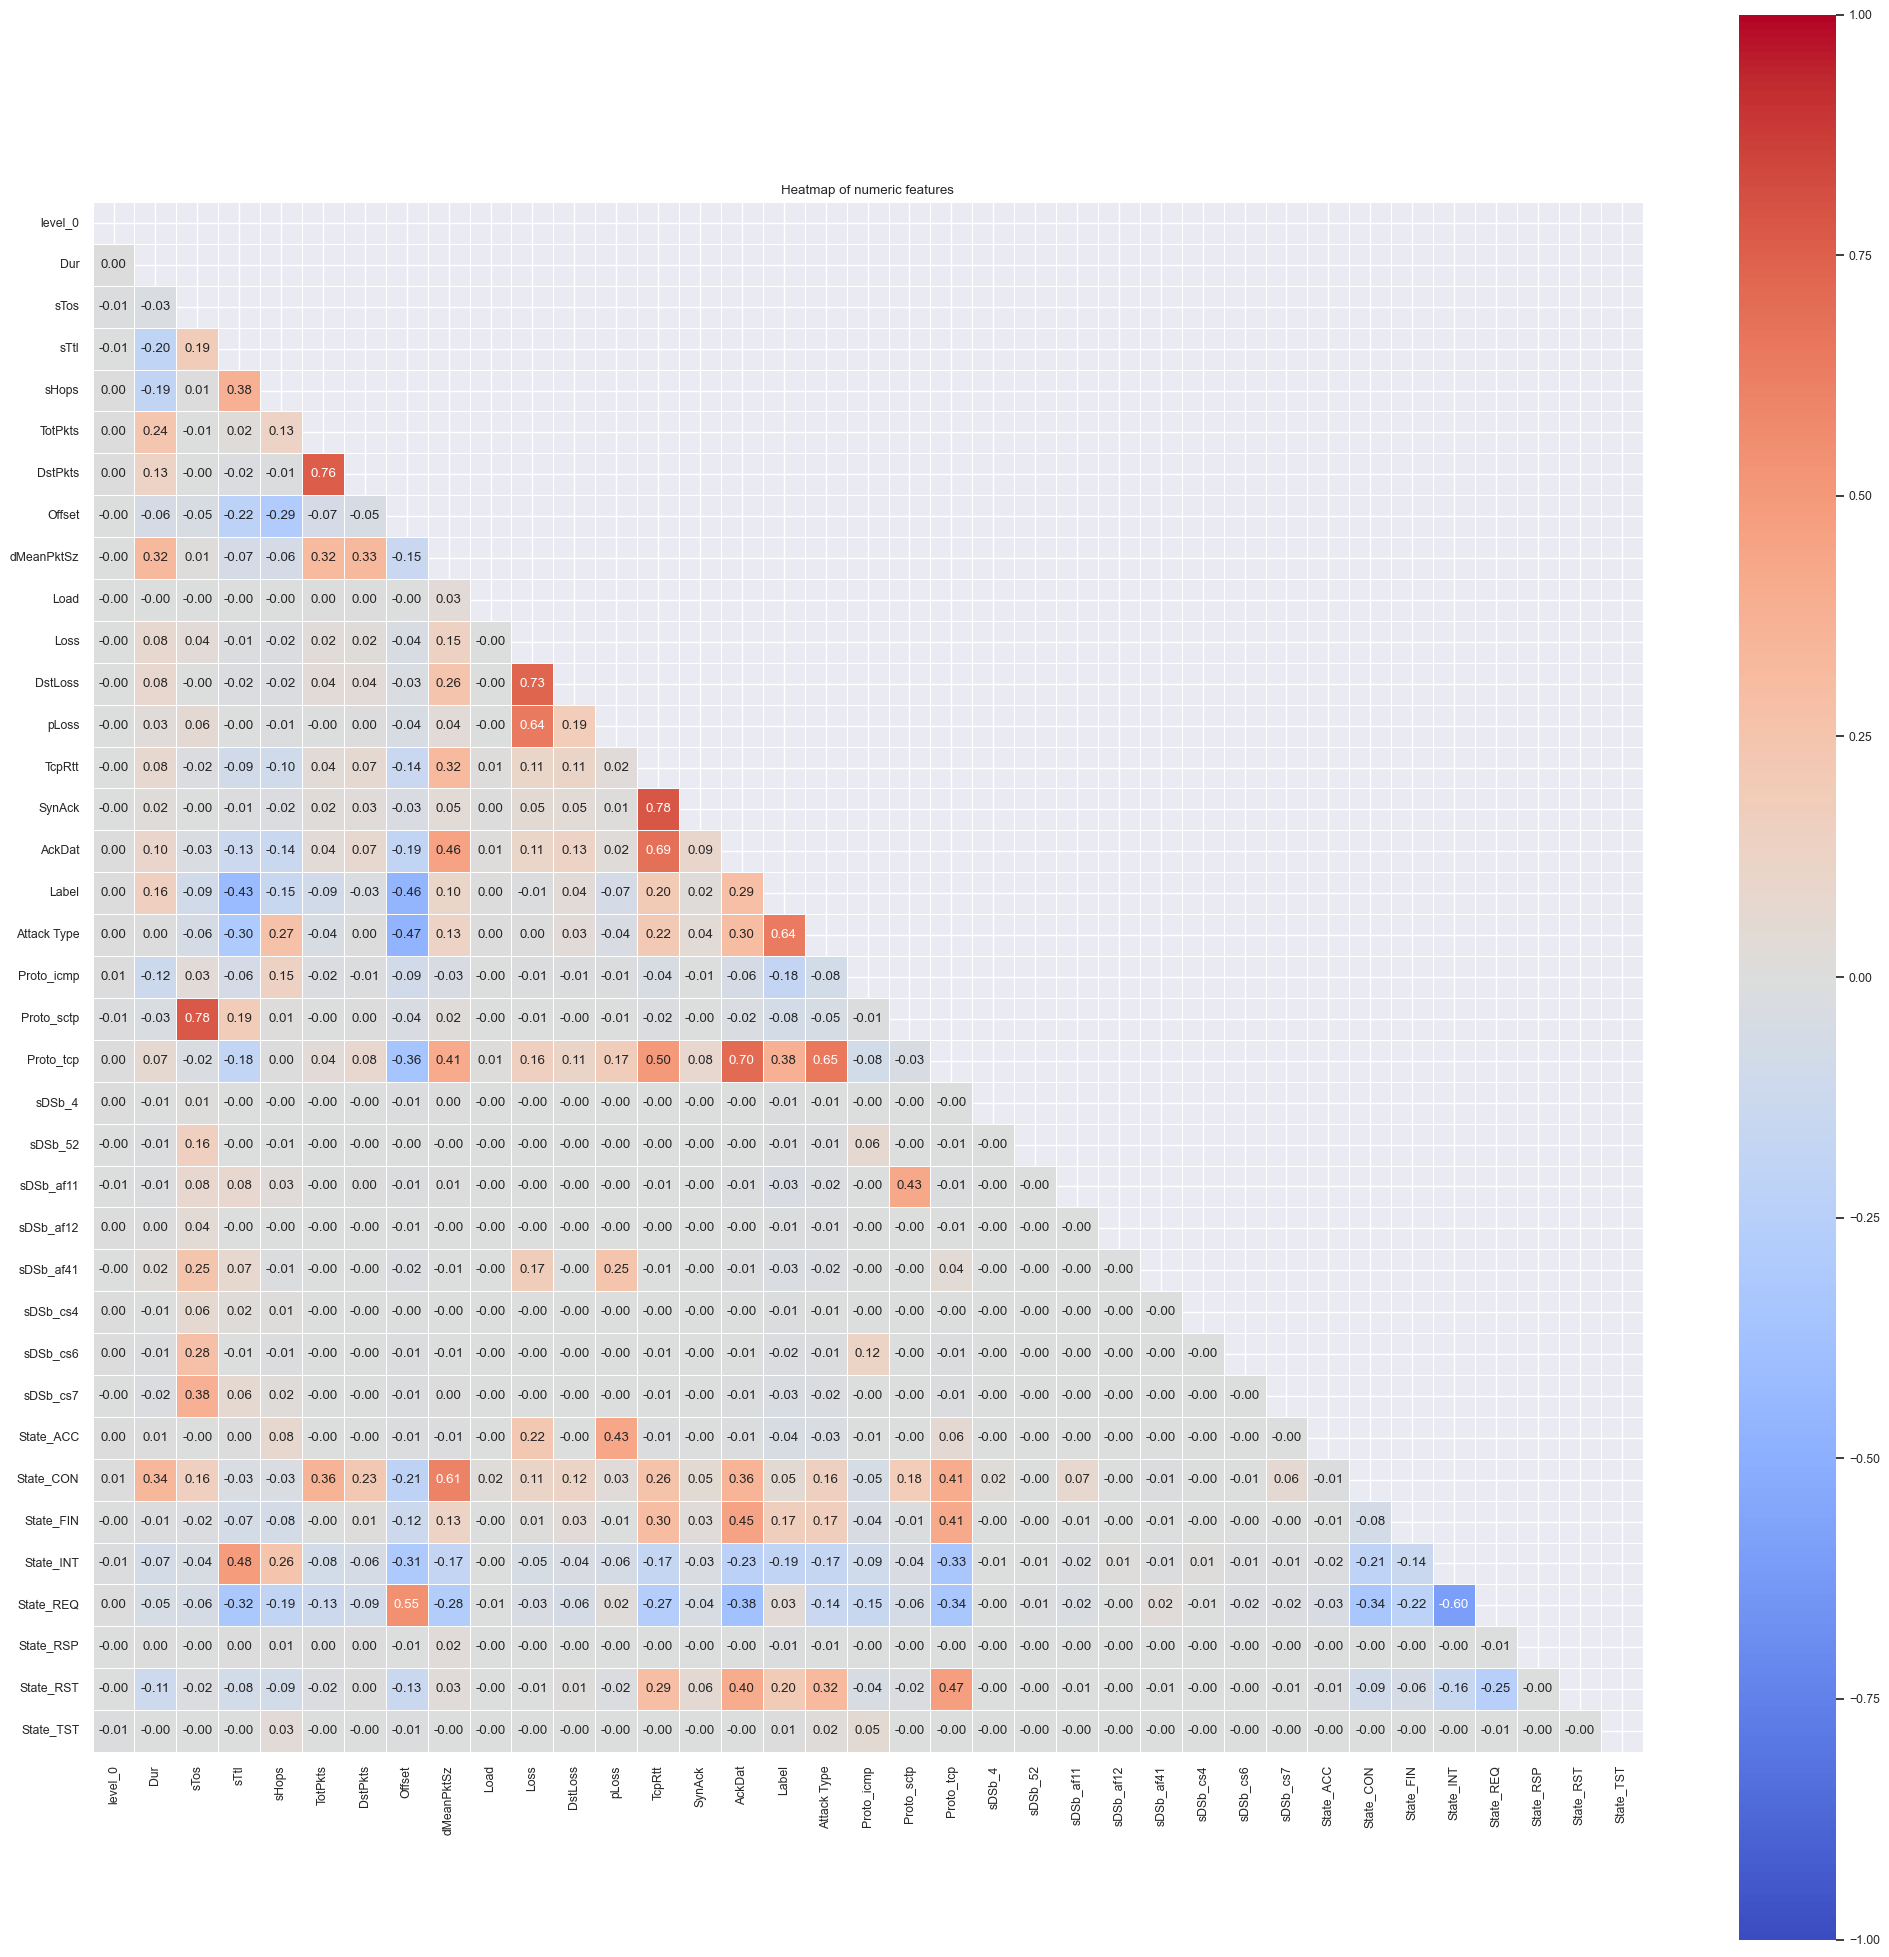

In [56]:
plt.figure(figsize = (25,25))
plt.rcParams.update({'font.size': 8})
numeric_corr = clean_df.corr(numeric_only=True)
sns.set(style="darkgrid",font_scale=0.8)
mask = np.triu(np.ones_like(numeric_corr, dtype=bool))
sns.heatmap(numeric_corr, cmap="coolwarm", vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.title("Heatmap of numeric features")
plt.savefig('images/heatmap_identify_relevent_features_encoded_cleaned.png', bbox_inches='tight')
plt.show()
plt.close()
plt.clf()

In addition to the contributing numberical features identifed above, the following categorical features are contributing to the Label and Attack Type:  State and Protocol

In [57]:
sns.reset_orig() 
plt.close()
plt.clf()

In [58]:
data = clean_df
clean_df.shape

(49992, 37)

In [59]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49992 entries, 0 to 49991
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   level_0      49992 non-null  int64  
 1   Dur          49992 non-null  float64
 2   sTos         49992 non-null  float64
 3   sTtl         49992 non-null  float64
 4   sHops        49992 non-null  float64
 5   TotPkts      49992 non-null  int64  
 6   DstPkts      49992 non-null  int64  
 7   Offset       49992 non-null  int64  
 8   dMeanPktSz   49992 non-null  float64
 9   Load         49992 non-null  float64
 10  Loss         49992 non-null  int64  
 11  DstLoss      49992 non-null  int64  
 12  pLoss        49992 non-null  float64
 13  TcpRtt       49992 non-null  float64
 14  SynAck       49992 non-null  float64
 15  AckDat       49992 non-null  float64
 16  Label        49992 non-null  int64  
 17  Attack Type  49992 non-null  int64  
 18  Proto_icmp   49992 non-null  float64
 19  Prot

### Train/Test Split - One for Binary classification and the other for Multi-class classification

With your data prepared, split it into a train and test set.

In [60]:
test_size = 0.3
random_state = 42

In [61]:
# Train/Test split for binary classification - 'Label' - Melicious attack detection
Xbin = data.drop(['Attack Type', 'Label'], axis=1) 
ybin = data['Label']
Xbin_train_tmp, Xbin_test_tmp, ybin_train, ybin_test = train_test_split(Xbin, ybin, test_size=test_size, random_state=random_state)

scaler_train = StandardScaler()
Xbin_train = pd.DataFrame(scaler_train.fit_transform(Xbin_train_tmp), columns=Xbin_train_tmp.columns)
scaler_test = StandardScaler()
Xbin_test = pd.DataFrame(scaler_test.fit_transform(Xbin_test_tmp), columns=Xbin_test_tmp.columns)

print( "Xbin_train shape = " + str(Xbin_train.shape) + "\n Xbin_test shape = " + str(Xbin_test.shape))
print( "ybin_train shape = " + str(ybin_train.shape) + "\n ybin_test shape = " + str(ybin_test.shape))
Xbin_train.head()

Xbin_train shape = (34994, 35)
 Xbin_test shape = (14998, 35)
ybin_train shape = (34994,)
 ybin_test shape = (14998,)


level_0       Dur     sTos      sTtl     sHops   TotPkts   DstPkts  \
0 -0.758838 -0.793798 -0.06943 -0.326517 -0.353238 -0.008309  0.026645   
1 -1.471307  1.890357 -0.06943 -0.326517 -0.353238 -0.111354 -0.086643   
2 -1.536618 -0.807809 -0.06943 -0.326517 -0.353238 -0.111354 -0.029999   
3  0.966823 -0.807809 -0.06943 -0.326517 -0.353238 -0.145702 -0.086643   
4  0.254008 -0.807809 -0.06943 -0.326517 -0.353238 -0.145702 -0.086643   

     Offset  dMeanPktSz      Load      Loss   DstLoss     pLoss    TcpRtt  \
0 -1.121765    0.045978 -0.006247 -0.084809 -0.061155 -0.093652  0.856174   
1 -0.656525   -0.283842 -0.006618 -0.084809 -0.061155 -0.093652 -0.259800   
2  0.063900    0.027131 -0.006618 -0.084809 -0.061155 -0.093652  1.029769   
3 -0.461016   -0.283842 -0.006618 -0.084809 -0.061155 -0.093652 -0.259800   
4 -0.421553   -0.283842 -0.006618 -0.084809 -0.061155 -0.093652 -0.259800   

     SynAck    AckDat  Proto_icmp  Proto_sctp  Proto_tcp    sDSb_4   sDSb_52  \
0  0.086611  1.347054   -0.155675   -0.061767   1.831276 -0.005346 -0.010692   
1 -0.043810 -0.386045   -0.155675   -0.061767  -0.546067 -0.005346 -0.010692   
2  0.165826  1.540303   -0.155675   -0.061767   1.831276 -0.005346 -0.010692   
3 -0.043810 -0.386045   -0.155675   -0.061767  -0.546067 -0.005346 -0.010692   
4 -0.043810 -0.386045   -0.155675   -0.061767  -0.546067 -0.005346 -0.010692   

   sDSb_af11  sDSb_af12  sDSb_af41  sDSb_cs4  sDSb_cs6  sDSb_cs7  State_ACC  \
0  -0.025645  -0.013095  -0.022046 -0.005346 -0.019278 -0.019278  -0.032971   
1  -0.025645  -0.013095  -0.022046 -0.005346 -0.019278 -0.019278  -0.032971   
2  -0.025645  -0.013095  -0.022046 -0.005346 -0.019278 -0.019278  -0.032971   
3  -0.025645  -0.013095  -0.022046 -0.005346 -0.019278 -0.019278  -0.032971   
4  -0.025645  -0.013095  -0.022046 -0.005346 -0.019278 -0.019278  -0.032971   

   State_CON  State_FIN  State_INT  State_REQ  State_RSP  State_RST  State_TST  
0   2.888200  -0.224424  -0.606031  -0.978737  -0.005346  -0.257876   -0.00756  
1  -0.346236  -0.224424   1.650081  -0.978737  -0.005346  -0.257876   -0.00756  
2  -0.346236   4.455849  -0.606031  -0.978737  -0.005346  -0.257876   -0.00756  
3  -0.346236  -0.224424   1.650081  -0.978737  -0.005346  -0.257876   -0.00756  
4  -0.346236  -0.224424   1.650081  -0.978737  -0.005346  -0.257876   -0.00756

In [62]:
# Train/Test split for multi-class classification - 'Attack Type' - Determine type of melicious attack
Xmc = data.drop(['Attack Type', 'Label'], axis=1) 
ymc = data['Attack Type']
Xmc_train_tmp, Xmc_test_tmp, ymc_train, ymc_test = train_test_split(Xmc, ymc, test_size=test_size, random_state=random_state)

scaler_train = StandardScaler()
Xmc_train = pd.DataFrame(scaler_train.fit_transform(Xmc_train_tmp), columns=Xmc_train_tmp.columns)
scaler_test = StandardScaler()
Xmc_test = pd.DataFrame(scaler_test.fit_transform(Xmc_test_tmp), columns=Xmc_test_tmp.columns)

print( "Xmc_train shape = " + str(Xmc_train.shape) + "\n Xmc_test shape = " + str(Xmc_test.shape))
print( "ymc_train shape = " + str(ymc_train.shape) + "\n ymc_test shape = " + str(ymc_test.shape))
Xmc_train.head()

Xmc_train shape = (34994, 35)
 Xmc_test shape = (14998, 35)
ymc_train shape = (34994,)
 ymc_test shape = (14998,)


level_0       Dur     sTos      sTtl     sHops   TotPkts   DstPkts  \
0 -0.758838 -0.793798 -0.06943 -0.326517 -0.353238 -0.008309  0.026645   
1 -1.471307  1.890357 -0.06943 -0.326517 -0.353238 -0.111354 -0.086643   
2 -1.536618 -0.807809 -0.06943 -0.326517 -0.353238 -0.111354 -0.029999   
3  0.966823 -0.807809 -0.06943 -0.326517 -0.353238 -0.145702 -0.086643   
4  0.254008 -0.807809 -0.06943 -0.326517 -0.353238 -0.145702 -0.086643   

     Offset  dMeanPktSz      Load      Loss   DstLoss     pLoss    TcpRtt  \
0 -1.121765    0.045978 -0.006247 -0.084809 -0.061155 -0.093652  0.856174   
1 -0.656525   -0.283842 -0.006618 -0.084809 -0.061155 -0.093652 -0.259800   
2  0.063900    0.027131 -0.006618 -0.084809 -0.061155 -0.093652  1.029769   
3 -0.461016   -0.283842 -0.006618 -0.084809 -0.061155 -0.093652 -0.259800   
4 -0.421553   -0.283842 -0.006618 -0.084809 -0.061155 -0.093652 -0.259800   

     SynAck    AckDat  Proto_icmp  Proto_sctp  Proto_tcp    sDSb_4   sDSb_52  \
0  0.086611  1.347054   -0.155675   -0.061767   1.831276 -0.005346 -0.010692   
1 -0.043810 -0.386045   -0.155675   -0.061767  -0.546067 -0.005346 -0.010692   
2  0.165826  1.540303   -0.155675   -0.061767   1.831276 -0.005346 -0.010692   
3 -0.043810 -0.386045   -0.155675   -0.061767  -0.546067 -0.005346 -0.010692   
4 -0.043810 -0.386045   -0.155675   -0.061767  -0.546067 -0.005346 -0.010692   

   sDSb_af11  sDSb_af12  sDSb_af41  sDSb_cs4  sDSb_cs6  sDSb_cs7  State_ACC  \
0  -0.025645  -0.013095  -0.022046 -0.005346 -0.019278 -0.019278  -0.032971   
1  -0.025645  -0.013095  -0.022046 -0.005346 -0.019278 -0.019278  -0.032971   
2  -0.025645  -0.013095  -0.022046 -0.005346 -0.019278 -0.019278  -0.032971   
3  -0.025645  -0.013095  -0.022046 -0.005346 -0.019278 -0.019278  -0.032971   
4  -0.025645  -0.013095  -0.022046 -0.005346 -0.019278 -0.019278  -0.032971   

   State_CON  State_FIN  State_INT  State_REQ  State_RSP  State_RST  State_TST  
0   2.888200  -0.224424  -0.606031  -0.978737  -0.005346  -0.257876   -0.00756  
1  -0.346236  -0.224424   1.650081  -0.978737  -0.005346  -0.257876   -0.00756  
2  -0.346236   4.455849  -0.606031  -0.978737  -0.005346  -0.257876   -0.00756  
3  -0.346236  -0.224424   1.650081  -0.978737  -0.005346  -0.257876   -0.00756  
4  -0.346236  -0.224424   1.650081  -0.978737  -0.005346  -0.257876   -0.00756

In [71]:
#Baseline classification model "dummyClassifier" for the multiclass classification
dummy_clf_bin = DummyClassifier(strategy="most_frequent")
dummy_clf_bin.fit(Xbin_train, ybin_train)
dummy_clf_bin.predict(Xbin_test)
dummy_clf_bin.score(Xbin_test,ybin_test)

0.6098813175090012

In [72]:
#Baseline classification model "dummyClassifier" for binary classification
dummy_clf_mc = DummyClassifier(strategy="most_frequent")
dummy_clf_mc.fit(Xmc_train, ymc_train)
dummy_clf_mc.predict(Xmc_test)
dummy_clf_mc.score(Xmc_test,ymc_test)


0.3901186824909988

### Cross-validation
    Algorithms to consider:

    - Logistic Regression
    - KNeighborsClassifier
    - DecisionTreeClassifier
    - SVM
    
    

In [73]:
def lists_to_dict (keys, items):
    return {key: item for key,item in zip(keys, items)}

# models names
model_names = ['LR', 'KNN', 'DT', 'SVC']
# param grids for gridsearch
param_grids = [
    {
        'penalty' : ['l1', 'l2', 'none'],
        'C' : np.logspace(-4, 4, 20),
        'solver' : ['lbfgs','newton-cg','sag','saga'],
        'max_iter' : [100, 1000,2500, 5000],
        'multi_class' : ['multinomial']
    },
    { 
        'n_neighbors' : [5,7,9,11,13,15],
        'weights' : ['uniform','distance'],
        'metric' : ['minkowski','euclidean','manhattan']
    },
    {
        'max_depth': [2, 3, 5, 10, 20],
        'min_samples_leaf': [5, 10, 20, 50, 100],
        'criterion': ["gini", "entropy"]
    },
    {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf', 'linear']
    }  
]

param_grids = lists_to_dict(model_names, param_grids)

# models for gridsearch
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC(probability=True)
]
models = lists_to_dict(model_names, models)
models
param_grids

{'LR': {'penalty': ['l1', 'l2', 'none'],
  'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
         4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
         2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
         1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
         5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
  'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
  'max_iter': [100, 1000, 2500, 5000],
  'multi_class': ['multinomial']},
 'KNN': {'n_neighbors': [5, 7, 9, 11, 13, 15],
  'weights': ['uniform', 'distance'],
  'metric': ['minkowski', 'euclidean', 'manhattan']},
 'DT': {'max_depth': [2, 3, 5, 10, 20],
  'min_samples_leaf': [5, 10, 20, 50, 100],
  'criterion': ['gini', 'entropy']},
 'SVC': {'C': [0.1, 1, 10, 100, 1000],
  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
  'kernel': ['rbf', 'linear']}}

In [74]:
from joblib import dump, load
import copy
import pickle

def n_best (gs_res, n=1):
    ind = np.where(gs_res['rank_test_score'] == n)[0][0]
    mu = gs_res["mean_test_score"][ind]
    std = gs_res["std_test_score"][ind]
    params = gs_res["params"][ind]
    return params, mu, std
   
def grid_search(models, params, X, Y, random_seed=None, silent=False, **kwargs):
    # result dict
    result = []
    rmodels = []
   
    for key in models.keys():
        print(key)
        res = {}
        res['algorithm'] = key
        # set seed
        if random_seed is not None:
            np.random.seed(random_seed)
        x = X
        # gridsearch
        gs = GridSearchCV(estimator=models[key], param_grid=params[key], cv=3, scoring = "accuracy", n_jobs=-1, verbose=1).fit(x, Y)
            
        # best estimator parameters, cross validation mean score and score std
        res['params'], res['mean_score'], res['std_score'] = n_best(gs.cv_results_)
        # save cv_results_
        res['cv_result'] = copy.deepcopy(gs.cv_results_)
        result.append(res)
        print(res)
        rmodels.append(gs.best_estimator_)
    return result, rmodels


In [75]:
# Evalute the ROC
def plot_confusion_matrix_func(class_type, models, X_t, y_t, x, y, x_dim, y_dim):
    sns.reset_orig() 
    fig, ax = plt.subplots(x,y, figsize=(x_dim, y_dim))
    i = 0
    j = 0
    for model in models:
        # Confusion Matrix
        cm = confusion_matrix(y_t, model.predict(X_t))
        disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
        if x > 1:
            disp_cm.plot(ax=ax[i,j])
        else:
            disp_cm.plot(ax=ax[j])

        try:
            fpr, tpr, thresholds = roc_curve(y_t, model.predict_proba(X_t)[:, 1], pos_label=1)
            fp = cm[0][1]
            fn = cm[1][0]
            auc = round(skl_auc(fpr, tpr), 2)
            print("\nModel = " + str(model) + " AUC = " + str(auc))
            #plt.savefig('images/test_dt_confusion_matrix.png')
            if x > 1:
                ax[i,j].set(
                    #xlabel="False Positive Rate",
                    #ylabel="True Positive Rate",
                    title= "Confusion Matrix - " + str(type(model).__name__),
                )
            else:
                ax[j].set(
                    #xlabel="False Positive Rate",
                    #ylabel="True Positive Rate",
                    title= "Confusion Matrix - " + str(type(model).__name__),
                )
        except:
            print("Method does not exit ...")
            
            
        if j == (y-1):
            j = 0
            i = i+1
        else:
            j = j + 1          
            
    plt.savefig('images/confusion_matrix_' + str(class_type) + '.png', bbox_inches='tight')
    plt.show()
    plt.close()
    plt.clf()

### Detecting melicious attack - binary classification model performance

In [76]:
bin_res_dict, rmodels = grid_search(models, param_grids, Xbin_train, ybin_train, random_seed=42)


LR
Fitting 3 folds for each of 960 candidates, totalling 2880 fits


/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

{'algorithm': 'LR', 'params': {'C': 78.47599703514607, 'max_iter': 2500, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}, 'mean_score': 0.9606218387851214, 'std_score': 0.0004902161381608904, 'cv_result': {'mean_fit_time': array([1.21467908e-02, 1.19009813e-02, 1.19991302e-02, 9.54689980e-02,
       6.44216537e-02, 1.36574427e-01, 3.00998052e-01, 4.39269622e-01,
       9.18896993e-03, 8.90930494e-03, 9.64109103e-03, 8.00593694e-03,
       7.36618042e-03, 9.11585490e-03, 9.43962733e-03, 1.13290707e-01,
       6.25100136e-02, 1.30871296e-01, 3.03677638e-01, 4.28421656e-01,
       9.05172030e-03, 6.40964508e-03, 8.59856606e-03, 7.21208254e-03,
       1.00735823e-02, 6.65354729e-03, 7.23958015e-03, 1.16115332e-01,
       6.15076224e-02, 1.19907697e-01, 2.95887232e-01, 4.33084647e-01,
       6.02928797e-03, 4.80063756e-03, 5.68167369e-03, 3.62380346e-03,
       5.99956512e-03, 7.36641884e-03, 6.05781873e-03, 1.08392080e-01,
       5.85592588e-02, 1.17011070e-01, 3.19701672e-

{'algorithm': 'KNN', 'params': {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}, 'mean_score': 0.9713093370579493, 'std_score': 0.0008762032807562596, 'cv_result': {'mean_fit_time': array([0.01292849, 0.01318296, 0.01906109, 0.01510183, 0.01302505,
       0.01362514, 0.01270803, 0.01391538, 0.0132544 , 0.01288931,
       0.01288835, 0.01344395, 0.01277161, 0.01277288, 0.01339738,
       0.0129834 , 0.01298173, 0.01325337, 0.01321507, 0.01258087,
       0.01303641, 0.01300589, 0.01315626, 0.01595863, 0.0173494 ,
       0.01261473, 0.01192236, 0.0127399 , 0.01228666, 0.01194898,
       0.01269674, 0.01190662, 0.01295193, 0.01278567, 0.01459392,
       0.01206303]), 'std_fit_time': array([8.95296040e-04, 2.38303024e-04, 3.56867021e-03, 2.60913425e-03,
       1.13468090e-03, 9.59375684e-04, 5.78886900e-04, 7.45391665e-04,
       3.16547873e-04, 4.31937281e-04, 1.45134371e-04, 5.23183483e-04,
       4.67726981e-04, 7.76093879e-05, 5.83339192e-04, 2.01220416e-04,
       3.39

{'algorithm': 'DT', 'params': {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}, 'mean_score': 0.9819396990085395, 'std_score': 0.0017510694979062874, 'cv_result': {'mean_fit_time': array([0.03366407, 0.03321656, 0.03595233, 0.04001633, 0.04270053,
       0.05745451, 0.0596633 , 0.0593884 , 0.06216908, 0.0584387 ,
       0.08392692, 0.09103568, 0.09128658, 0.08959079, 0.08683022,
       0.1340189 , 0.12383429, 0.12368131, 0.11780381, 0.11942561,
       0.13675944, 0.13815538, 0.13964033, 0.12940288, 0.12568029,
       0.05697131, 0.06615591, 0.06032769, 0.05746762, 0.05452609,
       0.06933872, 0.07425388, 0.07060202, 0.07392104, 0.07482958,
       0.1113011 , 0.10864456, 0.11387801, 0.10984143, 0.10757407,
       0.13137905, 0.12242397, 0.12683264, 0.11920094, 0.1163129 ,
       0.12096461, 0.11917893, 0.10795029, 0.11873627, 0.09817958]), 'std_fit_time': array([0.00043516, 0.00095055, 0.00307217, 0.00028105, 0.00072852,
       0.0005918 , 0.00335638, 0.00228557, 0.003146

{'algorithm': 'SVC', 'params': {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}, 'mean_score': 0.9775675184638369, 'std_score': 0.001660800833561866, 'cv_result': {'mean_fit_time': array([ 143.36067661,   58.66375113,  105.26116141,   61.31706476,
        197.30498568,   72.62413692,  411.85097329,   69.50805163,
        530.399616  ,   69.72243086,  107.71034733,   61.94396313,
         72.95220709,   67.67536799,   97.45646866,   64.54491544,
        183.13274471,   66.5682687 ,  369.82887936,   67.91257135,
         99.01514872,   87.62698404,   57.10349949,   85.08816242,
         58.77390607,   86.62155596,   93.58842206,   87.52977006,
        163.51792137,   86.22222908,  102.75498962,  226.97325969,
         51.70657134,  225.95820967,   47.08797375,  228.76386706,
         60.24209603,  224.1476446 ,   86.45588191,  223.11294587,
        143.00819278, 1303.40080261,   64.13324753, 1268.61521204,
         43.92956654, 1265.17015529,   45.20855665, 1144.66471036,
         55.82586161, 1

In [77]:
bin_results = pd.DataFrame(bin_res_dict)
bin_results

algorithm                                             params  mean_score  \
0        LR  {'C': 78.47599703514607, 'max_iter': 2500, 'mu...    0.960622   
1       KNN  {'metric': 'manhattan', 'n_neighbors': 15, 'we...    0.971309   
2        DT  {'criterion': 'gini', 'max_depth': 10, 'min_sa...    0.981940   
3       SVC           {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}    0.977568   

   std_score                                          cv_result  
0   0.000490  {'mean_fit_time': [0.012146790822347006, 0.011...  
1   0.000876  {'mean_fit_time': [0.012928485870361328, 0.013...  
2   0.001751  {'mean_fit_time': [0.03366406758626302, 0.0332...  
3   0.001661  {'mean_fit_time': [143.36067660649618, 58.6637...

In [78]:
lr = rmodels[0]
lr_train_acc = lr.score(Xbin_train, ybin_train)
lr_test_acc = lr.score(Xbin_test, ybin_test)
print('The accuracy of the Logistic Regression model for training data is {:.2f}'.format(lr_train_acc))
print('The accuracy of the Logistic Regression model for test data is {:.2f}'.format(lr_test_acc))

The accuracy of the Logistic Regression model for training data is 0.96
The accuracy of the Logistic Regression model for test data is 0.96


In [79]:
knn = rmodels[1] 
knn_train_acc = knn.score(Xbin_train, ybin_train)
knn_test_acc = knn.score(Xbin_test, ybin_test)
print('The accuracy of the KNeighborsClassifier model for training data is  {:.2f}'.format(knn_train_acc))
print('The accuracy of the KNeighborsClassifier model for test data is {:.2f}'.format(knn_test_acc))

The accuracy of the KNeighborsClassifier model for training data is  1.00
The accuracy of the KNeighborsClassifier model for test data is 0.97


In [80]:
dt = rmodels[2]
dt_train_acc = dt.score(Xbin_train, ybin_train)
dt_test_acc = dt.score(Xbin_test, ybin_test)
print('The accuracy of the DecisionTreeClassifier model for training data is  {:.2f}'.format(dt_train_acc))
print('The accuracy of the DecisionTreeClassifier model for test data is {:.2f}'.format(dt_test_acc))

The accuracy of the DecisionTreeClassifier model for training data is  0.98
The accuracy of the DecisionTreeClassifier model for test data is 0.97


In [81]:
svc = rmodels[3]
svc_train_acc = svc.score(Xbin_train, ybin_train)
svc_test_acc = svc.score(Xbin_test, ybin_test)
print('The accuracy of the SVC model for training data is  {:.2f}'.format(svc_train_acc))
print('The accuracy of the SVC model for test data is {:.2f}'.format(svc_test_acc))

The accuracy of the SVC model for training data is  0.98
The accuracy of the SVC model for test data is 0.95


In [82]:
model_comparison_df = pd.DataFrame({ 'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC'], \
                          'Train Accuracy':[lr_train_acc, knn_train_acc, dt_train_acc, svc_train_acc], \
                          'Test Accuracy':[lr_test_acc, knn_test_acc, dt_test_acc, svc_test_acc]})

print(model_comparison_df)

                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.961222       0.963462
1                  KNN        1.000000       0.969996
2        Decision Tree        0.984626       0.973063
3                  SVC        0.983883       0.945593



Model = LogisticRegression(C=78.47599703514607, max_iter=2500,
                   multi_class='multinomial', solver='sag') AUC = 0.99

Model = KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance') AUC = 1.0

Model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5) AUC = 0.99

Model = SVC(C=1000, gamma=1, probability=True) AUC = 0.96


<Figure size 640x480 with 0 Axes>

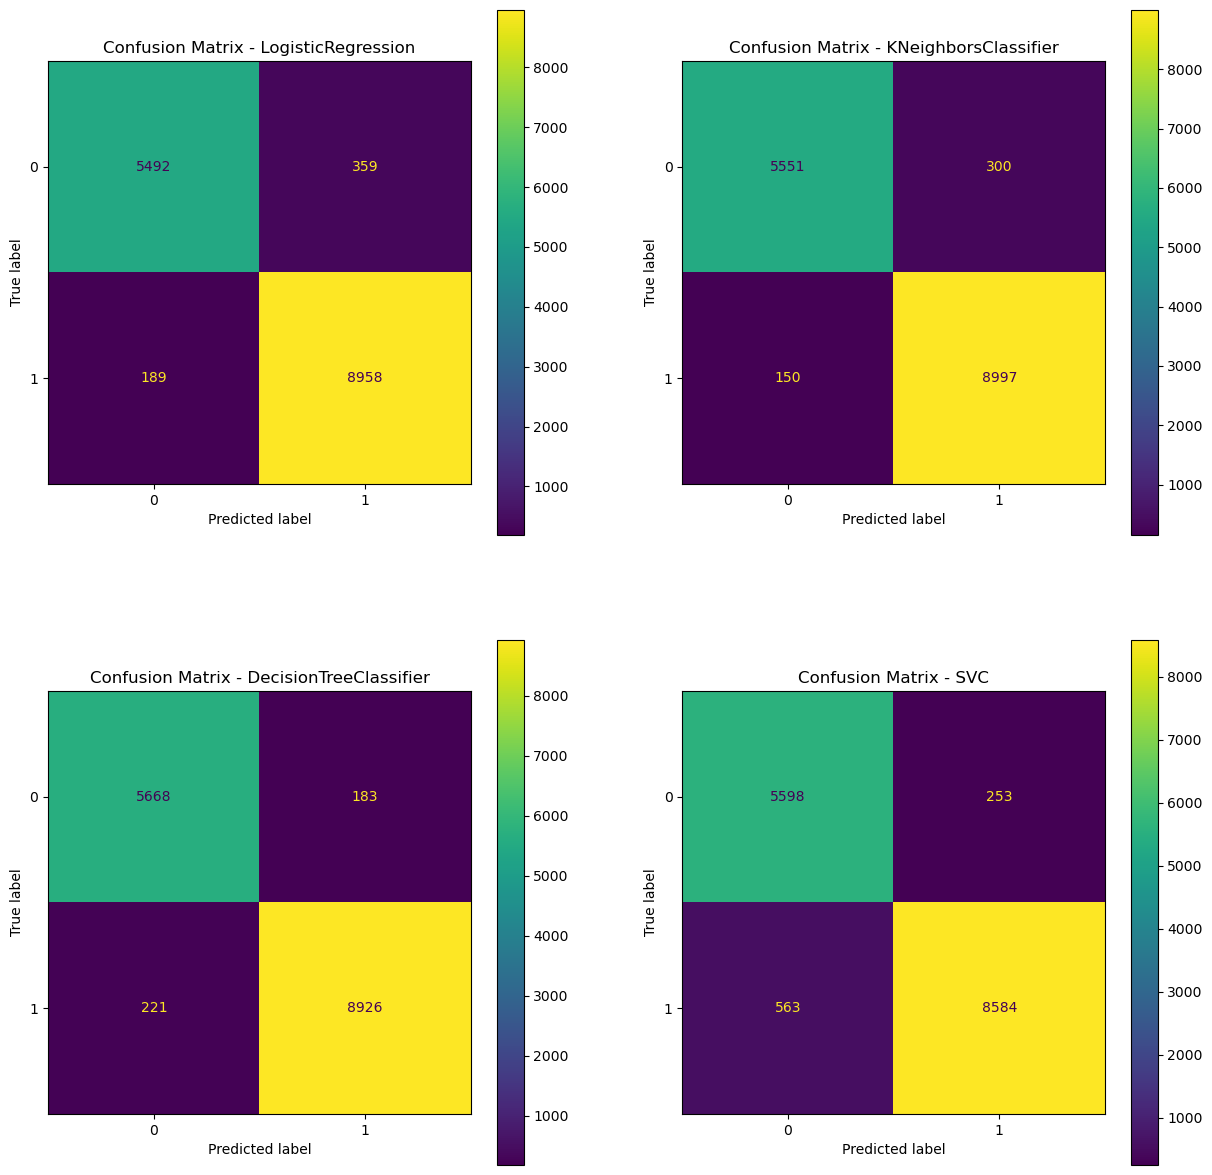

In [83]:
cmodels = [lr,knn, dt, svc]
plot_confusion_matrix_func('binary', cmodels, Xbin_test, ybin_test, 2, 2, 15, 15)

In [84]:
best_model_bin = dt

### Best model for binary classification confusion matrix with ROC plot

<Figure size 640x480 with 0 Axes>

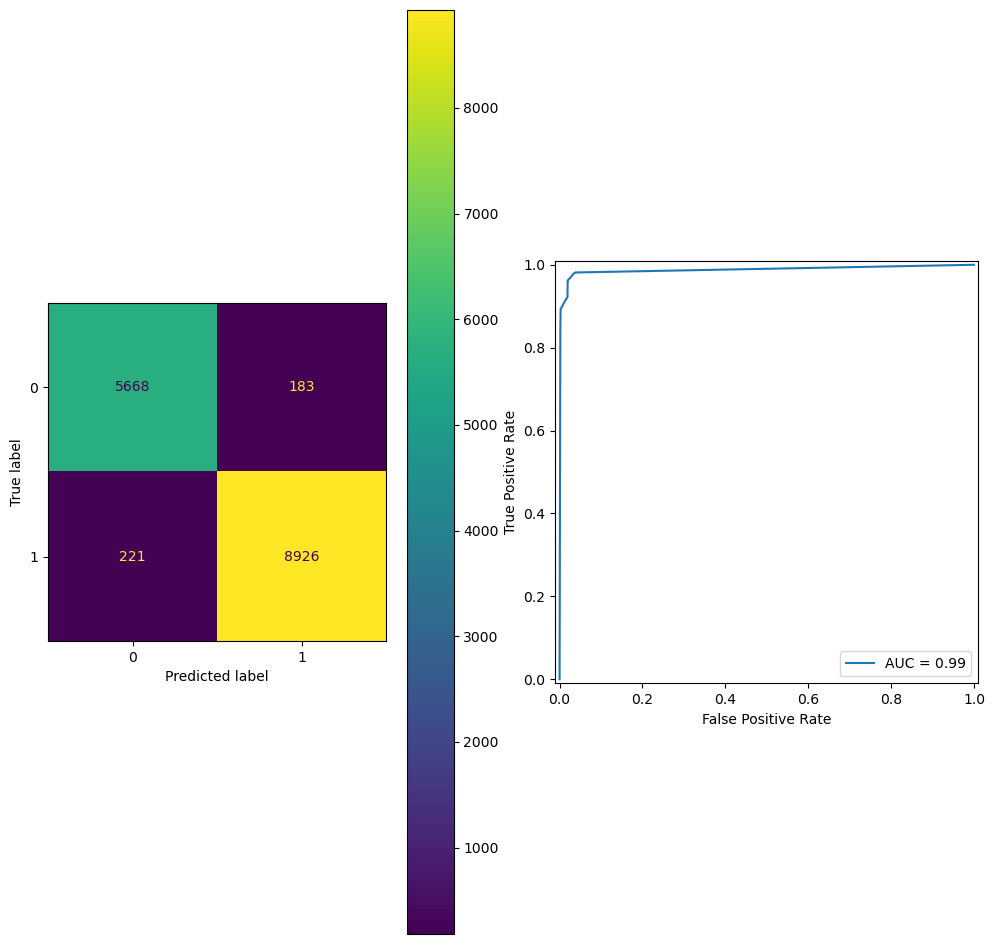

In [85]:
sns.reset_orig() 
fig, ax = plt.subplots(1, 2, figsize=(12, 12))

# Confusion Matrix
cm = confusion_matrix(ybin_test, best_model_bin.predict(Xbin_test), labels = best_model_bin.classes_)
disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = best_model_bin.classes_)
disp_cm.plot(ax=ax[0])

fpr, tpr, thresholds = roc_curve(ybin_test, best_model_bin.predict_proba(Xbin_test)[:, 1], pos_label=1)
disp_roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=skl_auc(fpr, tpr))
disp_roc.plot(ax=ax[1])

fp = cm[0][1]
fn = cm[1][0]
auc = round(skl_auc(fpr, tpr), 2)

plt.savefig('images/test_best_model_binary_confusion_matrix.png', bbox_inches='tight')
plt.show()

In [86]:
# Using binary best model, lets use it to get the top features that were selected. 
# Best on the result, features will be selected for further analysis before they are dropped.

results = permutation_importance(best_model_bin, Xbin_train, ybin_train, n_repeats=30, random_state=42)
important_features = results.importances_mean
sorted_idx = np.argsort(important_features)



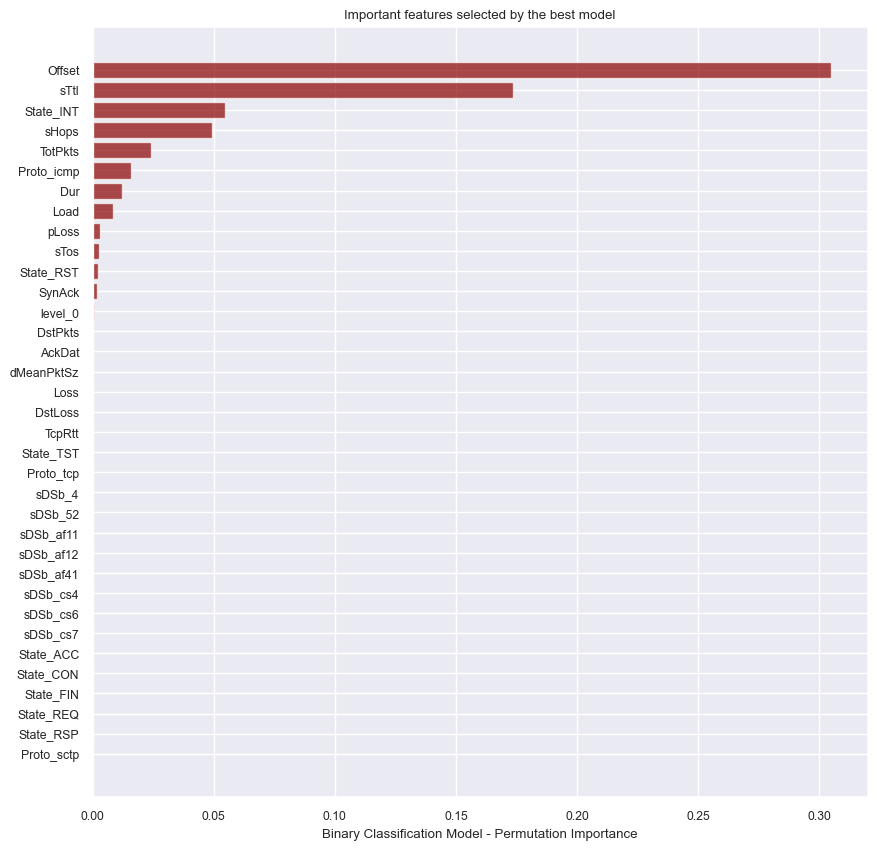

In [87]:
sns.set(style="darkgrid",font_scale=0.8)
fig, axs = plt.subplots(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), important_features[sorted_idx], color='darkred', alpha=0.7)
plt.yticks(range(len(sorted_idx)), Xbin_test.columns[sorted_idx]);
plt.xlabel('Binary Classification Model - Permutation Importance')
plt.title('Important features selected by the best model')
plt.savefig('images/bin_permutation_importance.png', bbox_inches='tight')
plt.show()
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

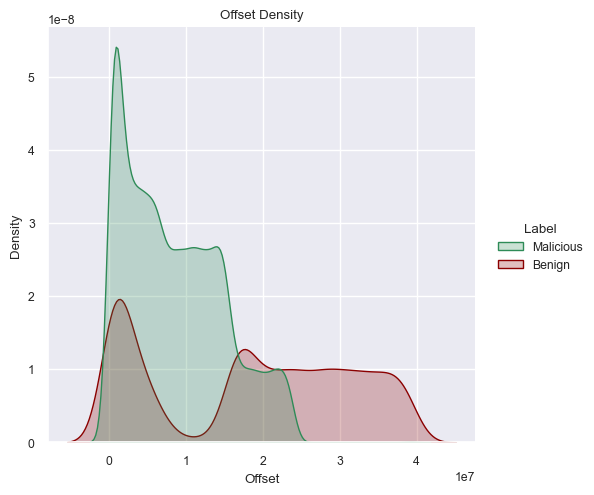

In [88]:
# Lets examine the top features selected by the best model
sns.displot(df, x="Offset", hue="Label", palette={'darkred', 'seagreen'}, kind="kde", fill=True)
plt.title('Offset Density')
plt.savefig('images/offset_density.png', bbox_inches='tight')
plt.show()
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

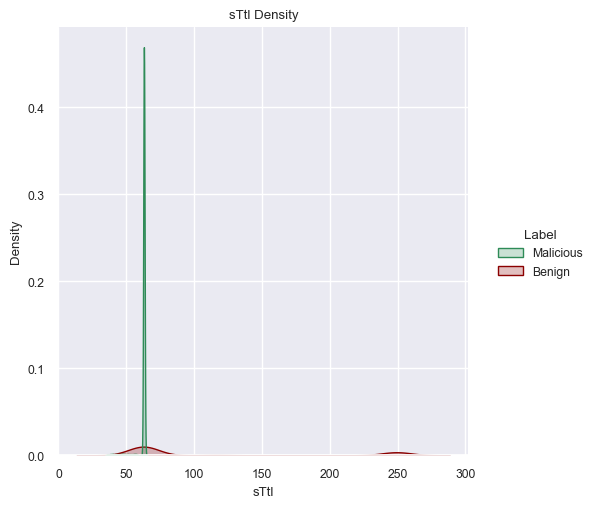

In [89]:
sns.displot(df, x="sTtl", hue="Label", palette={'darkred', 'seagreen'}, kind="kde", fill=True)
plt.title('sTtl Density')
plt.savefig('images/sttl_density.png', bbox_inches='tight')
plt.show()
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

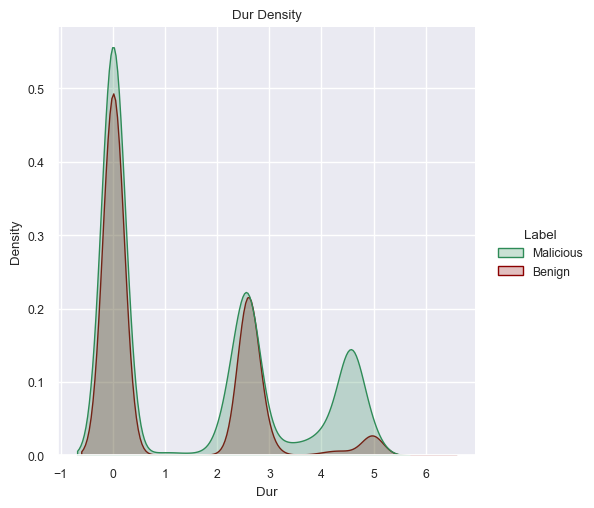

In [90]:
sns.displot(df, x="Dur", hue="Label", palette={'darkred', 'seagreen'}, kind="kde", fill=True)
plt.title('Dur Density')
plt.savefig('images/dur_density.png', bbox_inches='tight')
plt.show()
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

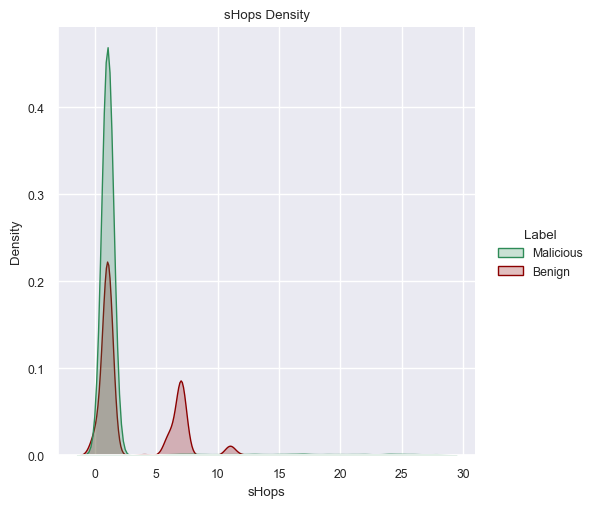

In [91]:
sns.displot(df, x="sHops", hue="Label", palette={'darkred', 'seagreen'}, kind="kde", fill=True)
plt.title('sHops Density')
plt.savefig('images/shops_density.png', bbox_inches='tight')
plt.show()
plt.close()
plt.clf()

### Determine melicious attack type - multi-class classification model performance

In [92]:
mc_res_dict, rmodels = grid_search(models, param_grids, Xmc_train, ymc_train, random_seed=42)


LR
Fitting 3 folds for each of 960 candidates, totalling 2880 fits


/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-pack

/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/abuameer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: Conve

{'algorithm': 'LR', 'params': {'C': 78.47599703514607, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}, 'mean_score': 0.9622221016876603, 'std_score': 0.00038487086350181426, 'cv_result': {'mean_fit_time': array([1.21854941e-02, 1.29168828e-02, 1.28003756e-02, 2.25440979e-01,
       5.63656012e-01, 9.61720785e-01, 2.81874291e+00, 5.92908899e+00,
       9.43613052e-03, 8.71109962e-03, 7.40567843e-03, 8.33574931e-03,
       6.60157204e-03, 6.73810641e-03, 7.85024961e-03, 3.69182189e-01,
       4.54219262e-01, 8.15936724e-01, 2.65728752e+00, 7.41042010e+00,
       6.55428569e-03, 6.09064102e-03, 5.37037849e-03, 5.25021553e-03,
       6.78443909e-03, 4.45302327e-03, 6.01466497e-03, 3.16429774e-01,
       4.37827428e-01, 7.95714617e-01, 2.73994629e+00, 7.39533758e+00,
       7.21700986e-03, 6.25093778e-03, 7.88752238e-03, 5.07863363e-03,
       6.78674380e-03, 5.49038251e-03, 8.57003530e-03, 3.05229982e-01,
       4.55762307e-01, 7.80405283e-01, 2.7055

{'algorithm': 'KNN', 'params': {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}, 'mean_score': 0.9668799956921142, 'std_score': 0.0014084734078990376, 'cv_result': {'mean_fit_time': array([0.00912436, 0.0120283 , 0.01330233, 0.0143954 , 0.01364366,
       0.01447074, 0.01410437, 0.01308282, 0.01391403, 0.01351293,
       0.01477504, 0.0143164 , 0.013913  , 0.0134929 , 0.0134751 ,
       0.01412201, 0.01385299, 0.01347804, 0.01308505, 0.01361736,
       0.01342829, 0.01319997, 0.01487994, 0.01469143, 0.01510572,
       0.01685492, 0.0126276 , 0.01364231, 0.01271232, 0.01289797,
       0.0126214 , 0.0125316 , 0.01249758, 0.01344029, 0.01270334,
       0.0126605 ]), 'std_fit_time': array([7.72810531e-05, 1.75111760e-03, 2.23884059e-04, 2.07433512e-04,
       6.70037071e-04, 1.13582929e-03, 3.34339081e-04, 2.31358612e-04,
       4.26591641e-04, 2.55633740e-04, 5.65634232e-04, 1.28945199e-04,
       7.15153378e-04, 3.45815627e-04, 1.25677929e-04, 8.74988671e-04,
       6.21

{'algorithm': 'DT', 'params': {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}, 'mean_score': 0.9791677789164864, 'std_score': 0.002174092741628856, 'cv_result': {'mean_fit_time': array([0.03923837, 0.03934964, 0.04643536, 0.04564675, 0.04496996,
       0.06112893, 0.06518634, 0.06539885, 0.13081098, 0.10085424,
       0.1984001 , 0.21263933, 0.1668489 , 0.22074739, 0.18158738,
       0.24509676, 0.23662599, 0.21475943, 0.20769119, 0.15914281,
       0.15867821, 0.13018378, 0.12651785, 0.11241865, 0.11879897,
       0.06235751, 0.06901725, 0.06809958, 0.06760057, 0.06461461,
       0.09344856, 0.08590396, 0.08626302, 0.0872937 , 0.08892496,
       0.12621299, 0.13023655, 0.12397377, 0.12939374, 0.12233678,
       0.15363328, 0.15010667, 0.15045396, 0.14494332, 0.14180605,
       0.15255435, 0.15224989, 0.1364994 , 0.15217066, 0.11911893]), 'std_fit_time': array([0.00175457, 0.00270921, 0.00202496, 0.00192131, 0.00173312,
       0.00153865, 0.0027327 , 0.00229669, 0.0453954

{'algorithm': 'SVC', 'params': {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}, 'mean_score': 0.9738811942760389, 'std_score': 0.0013460468742566305, 'cv_result': {'mean_fit_time': array([202.34143225,  42.41399908, 102.03095063,  41.57384928,
       157.11096303,  40.92946204, 439.64465737,  40.94498706,
       651.47378922,  42.0071257 , 173.41969037,  40.89172681,
        64.68916297,  37.53792604,  73.43065929,  37.87052647,
       150.77479529,  37.50704201, 389.38732632,  37.33493543,
       149.22605332,  45.08238928,  57.54169575,  44.51972651,
        48.88345098,  44.74470687,  72.63336198,  42.1793793 ,
       154.23025592,  44.23940992, 133.08375533,  72.67281755,
        55.20459572,  71.64843305,  41.72987509,  70.91335869,
        48.37504244,  71.06935811,  72.30836892,  71.73793999,
       131.13928   , 264.51332768,  62.95703061, 245.08799553,
        36.5510246 , 248.18839169,  37.41236663, 229.60057004,
        41.78352276, 178.06849035]), 'std_fit_time': array([ 2.7225481

In [93]:
mc_results = pd.DataFrame(mc_res_dict)

In [94]:
mc_results

algorithm                                             params  mean_score  \
0        LR  {'C': 78.47599703514607, 'max_iter': 100, 'mul...    0.962222   
1       KNN  {'metric': 'manhattan', 'n_neighbors': 15, 'we...    0.966880   
2        DT  {'criterion': 'gini', 'max_depth': 10, 'min_sa...    0.979168   
3       SVC           {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}    0.973881   

   std_score                                          cv_result  
0   0.000385  {'mean_fit_time': [0.012185494105021158, 0.012...  
1   0.001408  {'mean_fit_time': [0.009124358495076498, 0.012...  
2   0.002174  {'mean_fit_time': [0.03923837343851725, 0.0393...  
3   0.001346  {'mean_fit_time': [202.34143225351968, 42.4139...

In [95]:
lrmc = rmodels[0]
lr_train_acc = lrmc.score(Xmc_train, ymc_train)
lr_test_acc = lrmc.score(Xmc_test, ymc_test)
print('The accuracy of the Logistic Regression model for training data is {:.2f}'.format(lr_train_acc))
print('The accuracy of the Logistic Regression model for test data is {:.2f}'.format(lr_test_acc))

The accuracy of the Logistic Regression model for training data is 0.96
The accuracy of the Logistic Regression model for test data is 0.94


In [96]:
knnmc = rmodels[1] 
knn_train_acc = knnmc.score(Xmc_train, ymc_train)
knn_test_acc = knnmc.score(Xmc_test, ymc_test)
print('The accuracy of the KNeighborsClassifier model for training data is  {:.2f}'.format(knn_train_acc))
print('The accuracy of the KNeighborsClassifier model for test data is {:.2f}'.format(knn_test_acc))

The accuracy of the KNeighborsClassifier model for training data is  1.00
The accuracy of the KNeighborsClassifier model for test data is 0.97


In [97]:
dtmc = rmodels[2]
dt_train_acc = dtmc.score(Xmc_train, ymc_train)
dt_test_acc = dtmc.score(Xmc_test, ymc_test)
print('The accuracy of the DecisionTreeClassifier model for training data is  {:.2f}'.format(dt_train_acc))
print('The accuracy of the DecisionTreeClassifier model for test data is {:.2f}'.format(dt_test_acc))

The accuracy of the DecisionTreeClassifier model for training data is  0.98
The accuracy of the DecisionTreeClassifier model for test data is 0.96


In [98]:
svcmc = rmodels[3]
svc_train_acc = svcmc.score(Xmc_train, ymc_train)
svc_test_acc = svcmc.score(Xmc_test, ymc_test)
print('The accuracy of the SVC model for training data is  {:.2f}'.format(svc_train_acc))
print('The accuracy of the SVC model for test data is {:.2f}'.format(svc_test_acc))

The accuracy of the SVC model for training data is  0.98
The accuracy of the SVC model for test data is 0.94


In [99]:
model_comparison_df = pd.DataFrame({ 'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC'], \
                          'Train Accuracy':[lr_train_acc, knn_train_acc, dt_train_acc, svc_train_acc], \
                          'Test Accuracy':[lr_test_acc, knn_test_acc, dt_test_acc, svc_test_acc]})

print(model_comparison_df)

                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.962622       0.944193
1                  KNN        1.000000       0.965129
2        Decision Tree        0.981654       0.956794
3                  SVC        0.982368       0.940525



Model = LogisticRegression(C=78.47599703514607, multi_class='multinomial',
                   solver='newton-cg') AUC = 1.0

Model = KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance') AUC = 1.0

Model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5) AUC = 0.98

Model = SVC(C=1000, gamma=1, probability=True) AUC = 0.99


<Figure size 640x480 with 0 Axes>

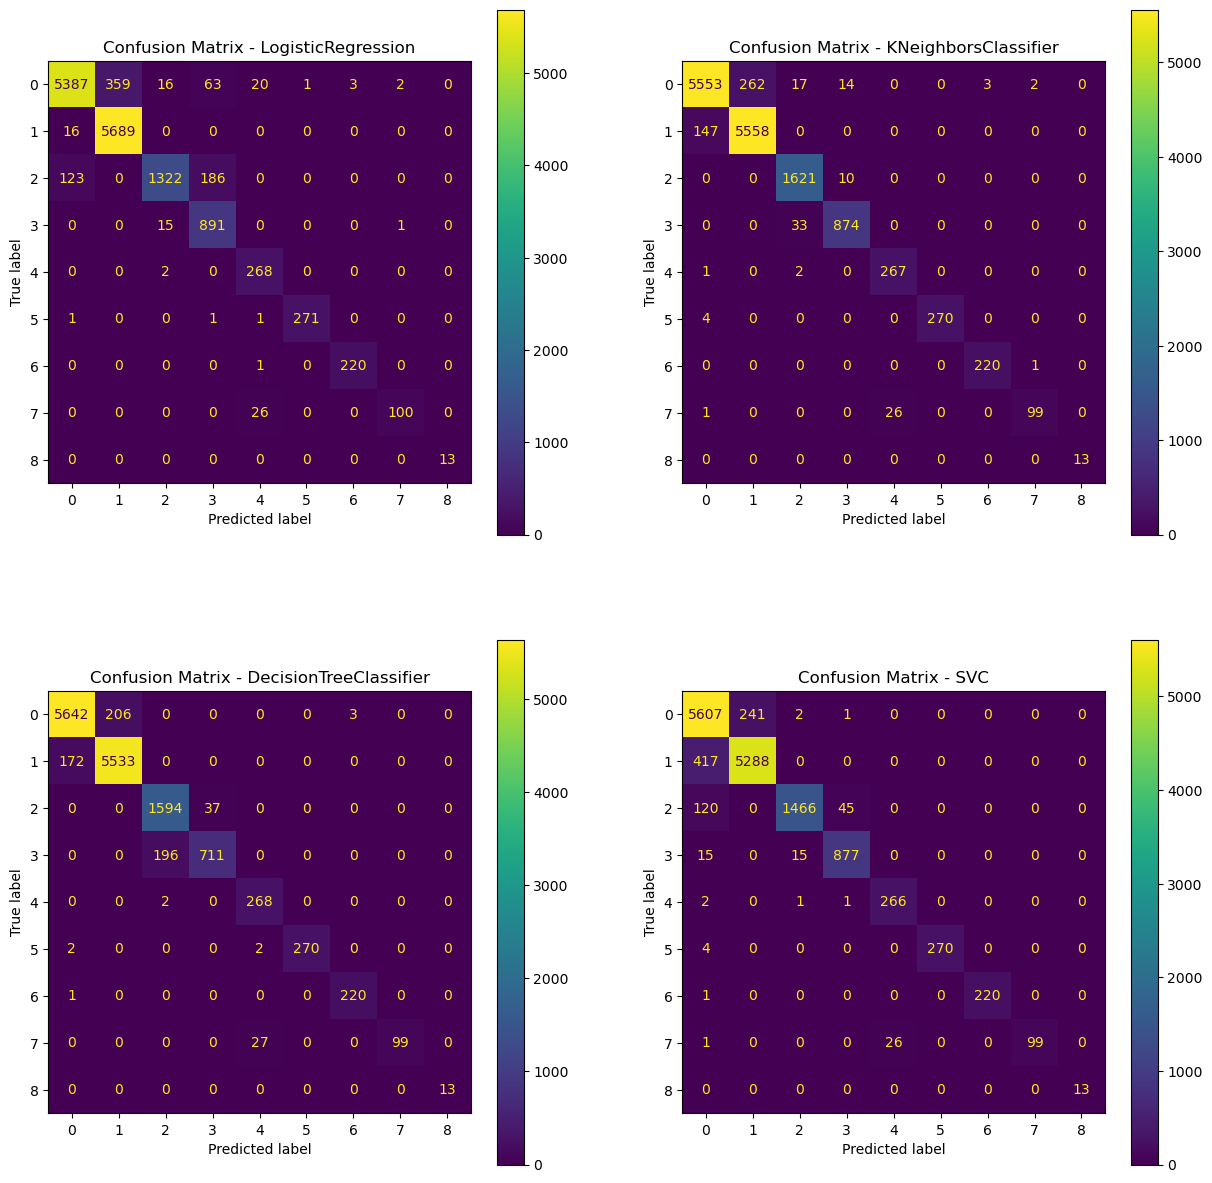

In [100]:
cmodels = [lrmc,knnmc, dtmc, svcmc]
plot_confusion_matrix_func('multi-class', cmodels, Xmc_test, ymc_test, 2, 2, 15, 15)

In [101]:
best_model_mc = knnmc

### Best model for multi-class classification confusion matrix with ROC plot

<Figure size 640x480 with 0 Axes>

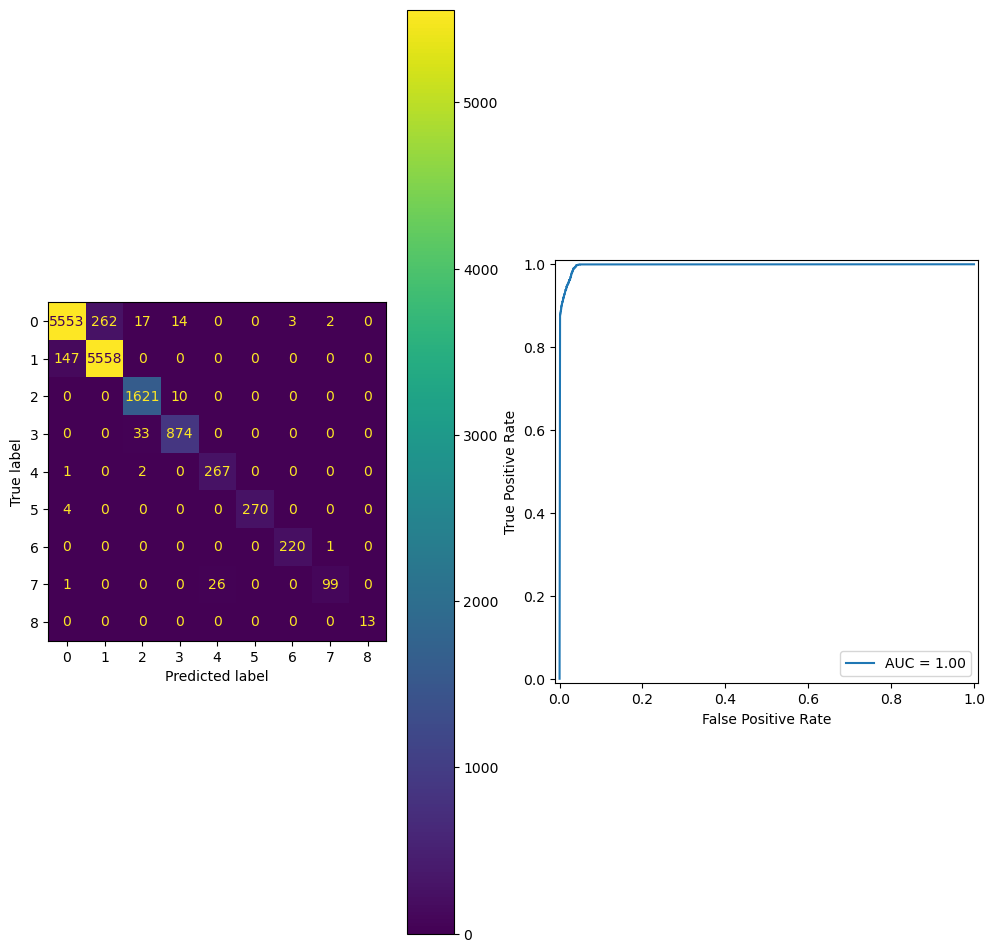

In [102]:
sns.reset_orig() 
fig, ax = plt.subplots(1, 2, figsize=(12, 12))

# Confusion Matrix
cm = confusion_matrix(ymc_test, best_model_mc.predict(Xmc_test), labels = best_model_mc.classes_)
disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = best_model_mc.classes_)
disp_cm.plot(ax=ax[0])

fpr, tpr, thresholds = roc_curve(ymc_test, best_model_mc.predict_proba(Xmc_test)[:, 1], pos_label=1)
disp_roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=skl_auc(fpr, tpr))
disp_roc.plot(ax=ax[1])

fp = cm[0][1]
fn = cm[1][0]
auc = round(skl_auc(fpr, tpr), 2)

plt.savefig('images/test_best_model_multi-class_confusion_matrix.png', bbox_inches='tight')
plt.show()

### Training

In [103]:
models

{'LR': LogisticRegression(),
 'KNN': KNeighborsClassifier(),
 'DT': DecisionTreeClassifier(),
 'SVC': SVC(probability=True)}

In [104]:
def train_all(res_tab, Xtrain, Ytrain, model_list=None):
    if model_list is None:
        model_list = res_tab['algorithm'].unique()
    table = res_tab[res_tab['algorithm'].isin(model_list)].set_index('algorithm')
    result = {}
    for model_name in model_list:
        model = copy.deepcopy(models[model_name])
        model.set_params(**table.loc[model_name, 'params'])
        model.fit(Xtrain, Ytrain)
        result[model_name] = model
    return result 

In [105]:
bin_models = train_all(bin_results, Xbin_train, ybin_train)

In [106]:
mc_models = train_all(mc_results, Xmc_train, ymc_train)

### Evaluating models

In [107]:
def eval_all(models, Xtest, Ytest, model_list=None, **kwargs):
    if model_list is None:
        model_list = list(models.keys())
    for key, model in models.items():
        print(key)
        y_pred = model.predict(Xtest)
        print(classification_report(Ytest, y_pred, **kwargs))

### Binary

In [108]:
eval_all(bin_models, Xbin_test, ybin_test, target_names={'Benign', 'Malicious'})

LR
              precision    recall  f1-score   support

   Malicious       0.97      0.94      0.95      5851
      Benign       0.96      0.98      0.97      9147

    accuracy                           0.96     14998
   macro avg       0.96      0.96      0.96     14998
weighted avg       0.96      0.96      0.96     14998

KNN
              precision    recall  f1-score   support

   Malicious       0.97      0.95      0.96      5851
      Benign       0.97      0.98      0.98      9147

    accuracy                           0.97     14998
   macro avg       0.97      0.97      0.97     14998
weighted avg       0.97      0.97      0.97     14998

DT
              precision    recall  f1-score   support

   Malicious       0.96      0.97      0.97      5851
      Benign       0.98      0.98      0.98      9147

    accuracy                           0.97     14998
   macro avg       0.97      0.97      0.97     14998
weighted avg       0.97      0.97      0.97     14998

SVC
     

### Multi-class

In [109]:
eval_all(mc_models, Xmc_test, ymc_test, target_names={'Benign', 'UDPFlood', 'HTTPFlood', 'SlowrateDoS', \
                                                      'TCPConnectScan', 'SYNScan', 'UDPScan', 'SYNFlood', 'ICMPFlood'})

LR
                precision    recall  f1-score   support

      SYNFlood       0.97      0.92      0.95      5851
     HTTPFlood       0.94      1.00      0.97      5705
      UDPFlood       0.98      0.81      0.89      1631
        Benign       0.78      0.98      0.87       907
     ICMPFlood       0.85      0.99      0.91       270
       SYNScan       1.00      0.99      0.99       274
   SlowrateDoS       0.99      1.00      0.99       221
TCPConnectScan       0.97      0.79      0.87       126
       UDPScan       1.00      1.00      1.00        13

      accuracy                           0.94     14998
     macro avg       0.94      0.94      0.94     14998
  weighted avg       0.95      0.94      0.94     14998

KNN
                precision    recall  f1-score   support

      SYNFlood       0.97      0.95      0.96      5851
     HTTPFlood       0.95      0.97      0.96      5705
      UDPFlood       0.97      0.99      0.98      1631
        Benign       0.97      0.96  

In [110]:
# Different Score View - Multi-class
labels = np.array(['Benign', 'UDPFlood', 'HTTPFlood', 'SlowrateDoS', 'TCPConnectScan', 'SYNScan', 'UDPScan', 'SYNFlood', 'ICMPFlood'])
model_list_mc = [lrmc, knnmc, dtmc]
model_comparison_mc = []
model_name_list_mc = []
for model_mc in model_list_mc:
    ymc_pred = model_mc.predict(Xmc_test)
    precision, recall, fscore, support = score(ymc_test, ymc_pred)
    model_name_list_mc.append(type(model_mc).__name__)
    model_comparison_mc.append(pd.DataFrame({ 'Classes': labels, \
                          'precision':precision, \
                          'recall':recall, \
                          'f1-score':fscore, \
                          'support':support}))

for item, mod_name in zip(model_comparison_mc, model_name_list_mc):
    print("\n\n")
    display("Model: " + mod_name)
    display(item)

'Model: LogisticRegression'

Classes  precision    recall  f1-score  support
0          Benign   0.974670  0.920697  0.946915     5851
1        UDPFlood   0.940642  0.997195  0.968093     5705
2       HTTPFlood   0.975646  0.810546  0.885466     1631
3     SlowrateDoS   0.780894  0.982359  0.870117      907
4  TCPConnectScan   0.848101  0.992593  0.914676      270
5         SYNScan   0.996324  0.989051  0.992674      274
6         UDPScan   0.986547  0.995475  0.990991      221
7        SYNFlood   0.970874  0.793651  0.873362      126
8       ICMPFlood   1.000000  1.000000  1.000000       13

'Model: KNeighborsClassifier'

Classes  precision    recall  f1-score  support
0          Benign   0.973186  0.949069  0.960976     5851
1        UDPFlood   0.954983  0.974233  0.964512     5705
2       HTTPFlood   0.968918  0.993869  0.981235     1631
3     SlowrateDoS   0.973274  0.963616  0.968421      907
4  TCPConnectScan   0.911263  0.988889  0.948490      270
5         SYNScan   1.000000  0.985401  0.992647      274
6         UDPScan   0.986547  0.995475  0.990991      221
7        SYNFlood   0.970588  0.785714  0.868421      126
8       ICMPFlood   1.000000  1.000000  1.000000       13

'Model: DecisionTreeClassifier'

Classes  precision    recall  f1-score  support
0          Benign   0.969916  0.964280  0.967089     5851
1        UDPFlood   0.964105  0.969851  0.966970     5705
2       HTTPFlood   0.889509  0.977315  0.931347     1631
3     SlowrateDoS   0.950535  0.783903  0.859215      907
4  TCPConnectScan   0.902357  0.992593  0.945326      270
5         SYNScan   1.000000  0.985401  0.992647      274
6         UDPScan   0.986547  0.995475  0.990991      221
7        SYNFlood   1.000000  0.785714  0.880000      126
8       ICMPFlood   1.000000  1.000000  1.000000       13

In [111]:
from itertools import combinations
from sklearn.preprocessing import LabelBinarizer

def plot_one_on_one_auc(model, X_te, y_te):
    sns.reset_orig() 
    plt.close()
    label_binarizer = LabelBinarizer().fit(y_te)
    pair_list = list(combinations(np.unique(ymc), 2))
    pair_scores = []
    target_names = np.array(['Benign', 'UDPFlood', 'HTTPFlood', 'SlowrateDoS', 'TCPConnectScan', 'SYNScan', 'UDPScan', 'SYNFlood', 'ICMPFlood'])
    mean_tpr = dict
    #y_score = lr.fit(X_tr, y_tr).predict_proba(X_te)
    fpr, tpr, thresholds = roc_curve(y_te, model.predict_proba(X_te)[:, 1], pos_label=1)
    y_score = model.predict_proba(X_te)
    fig, ax = plt.subplots(9, 4, figsize=(25, 80))
    plt.figure().clear()
    i = 0
    j = 0
    for ix, (label_a, label_b) in enumerate(pair_list):
        a_mask = y_te == label_a
        b_mask = y_te == label_b
        ab_mask = np.logical_or(a_mask, b_mask)
        
        fpr_grid = fpr
        a_true = a_mask[ab_mask]
        b_true = b_mask[ab_mask]

        idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
        idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]

        fpr_a, tpr_a, _ = roc_curve(a_true, y_score[ab_mask, idx_a])
        fpr_b, tpr_b, _ = roc_curve(b_true, y_score[ab_mask, idx_b])

        mean_tpr[ix] = np.zeros_like(fpr_grid)
        mean_tpr[ix] += np.interp(fpr_grid, fpr_a, tpr_a)
        mean_tpr[ix] += np.interp(fpr_grid, fpr_b, tpr_b)
        mean_tpr[ix] /= 2
        mean_score = metrics.auc(fpr_grid, mean_tpr[ix])
        pair_scores.append(mean_score)

        #fig, ax = plt.subplots(figsize=(6, 6))
        plt.plot(
            fpr_grid,
            mean_tpr[ix],
            #label=f"Mean {label_a} vs {label_b} (AUC = {mean_score :.2f})",
            linestyle=":",
            linewidth=4,
         
        )
    
        
        RocCurveDisplay.from_predictions(
            a_true,
            y_score[ab_mask, idx_a],
            ax=ax[i,j],
            name=f"{target_names[int(label_a)]} as positive class",
        )

        RocCurveDisplay.from_predictions(
            b_true,
            y_score[ab_mask, idx_b],
            ax=ax[i,j],
            name=f"{target_names[int(label_b)]} as positive class",
            plot_chance_level=True,
        )
        ax[i,j].set(
            xlabel="False Positive Rate",
            ylabel="True Positive Rate",
            title=f"{target_names[idx_a]} vs {target_names[int(label_b)]} ROC curves",
        )
        if j == 3:
            j = 0
            i = i + 1
        else:
            j = j + 1

    print(f"Macro-averaged One-vs-One ROC AUC score:\n{np.average(pair_scores):.2f}")
    plt.savefig('images/test_best_model_multi-class_one_vs_one_matrix.png', bbox_inches='tight')
    plt.show()
    plt.close()
    plt.clf()

Macro-averaged One-vs-One ROC AUC score:
0.99


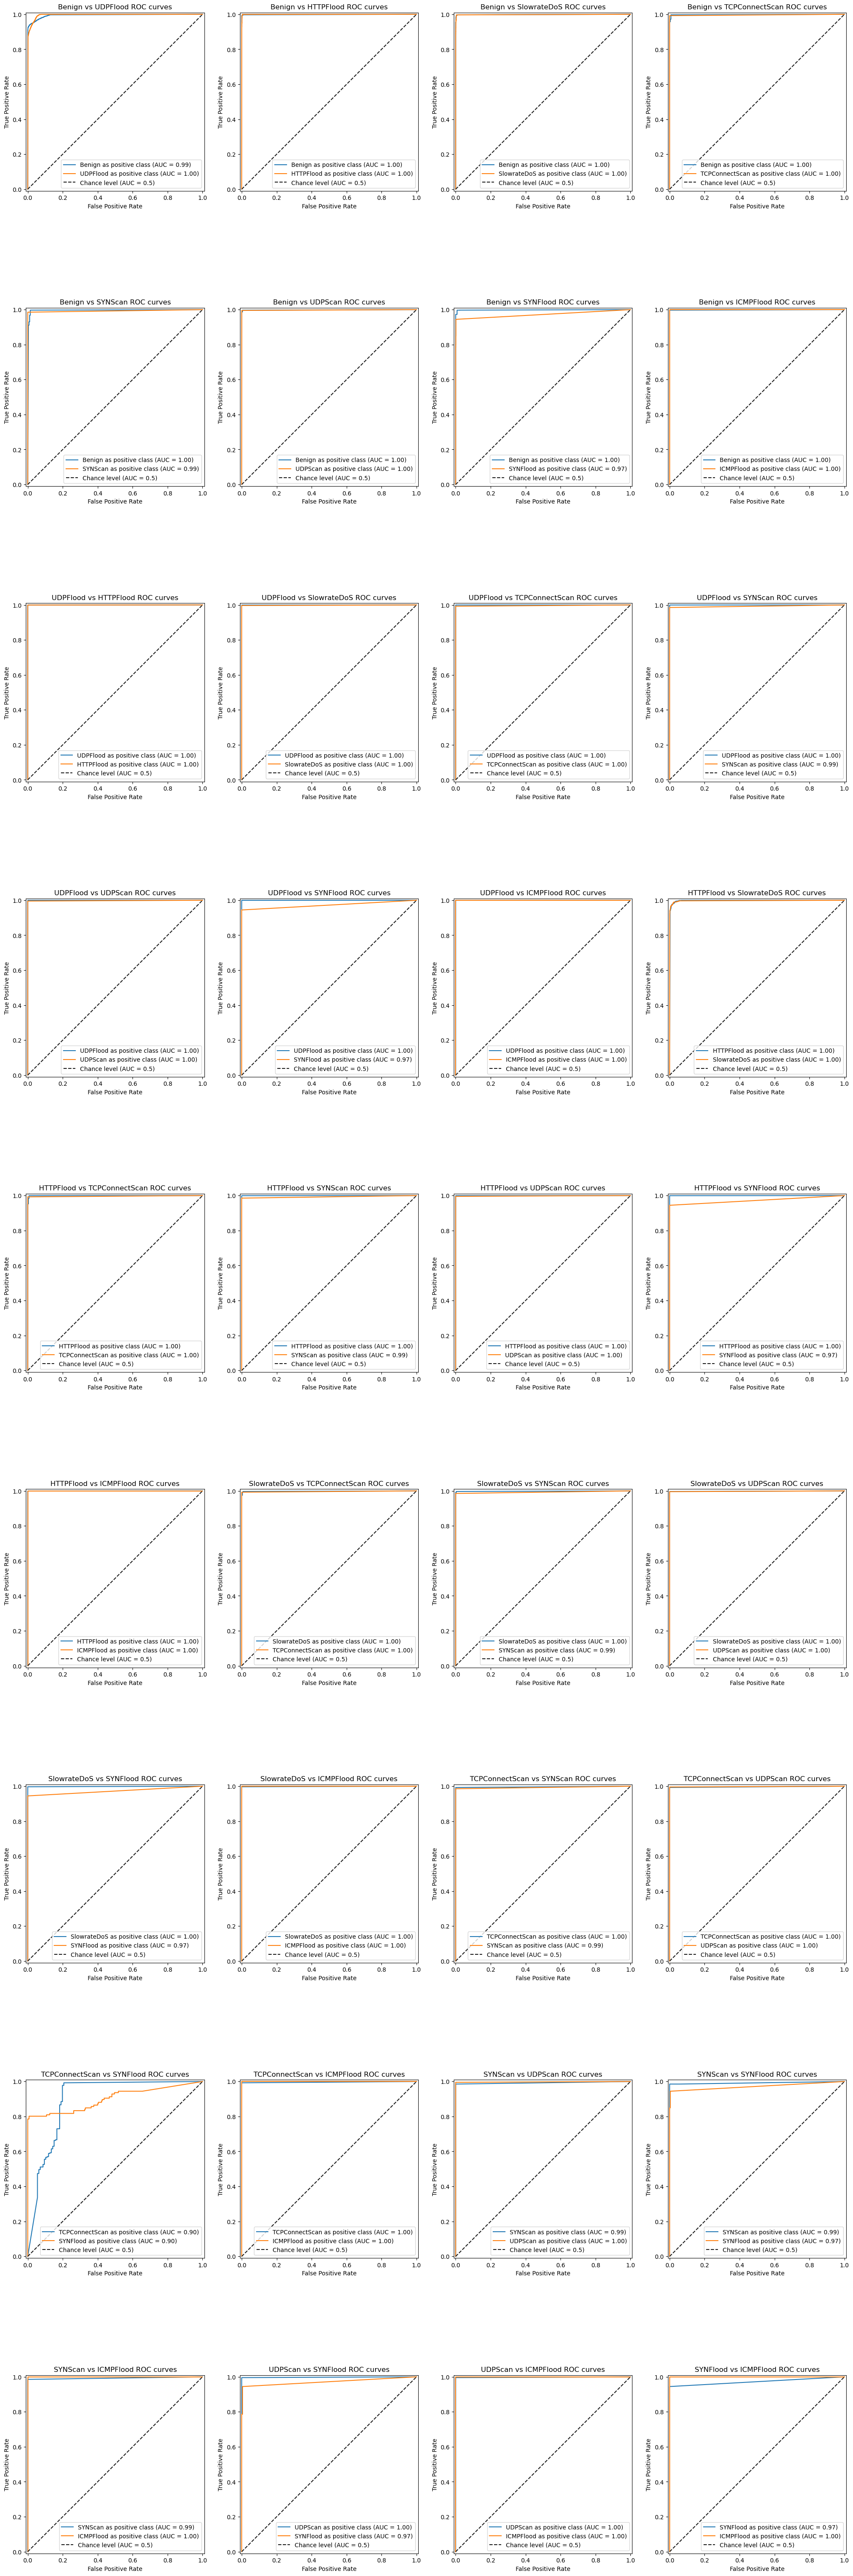

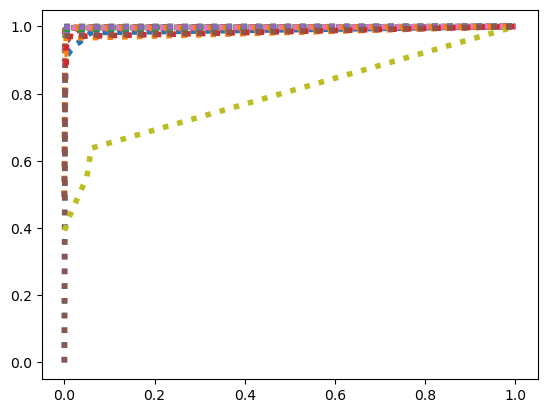

In [112]:

plot_one_on_one_auc(best_model_mc, Xmc_test, ymc_test)

<Figure size 640x480 with 0 Axes>

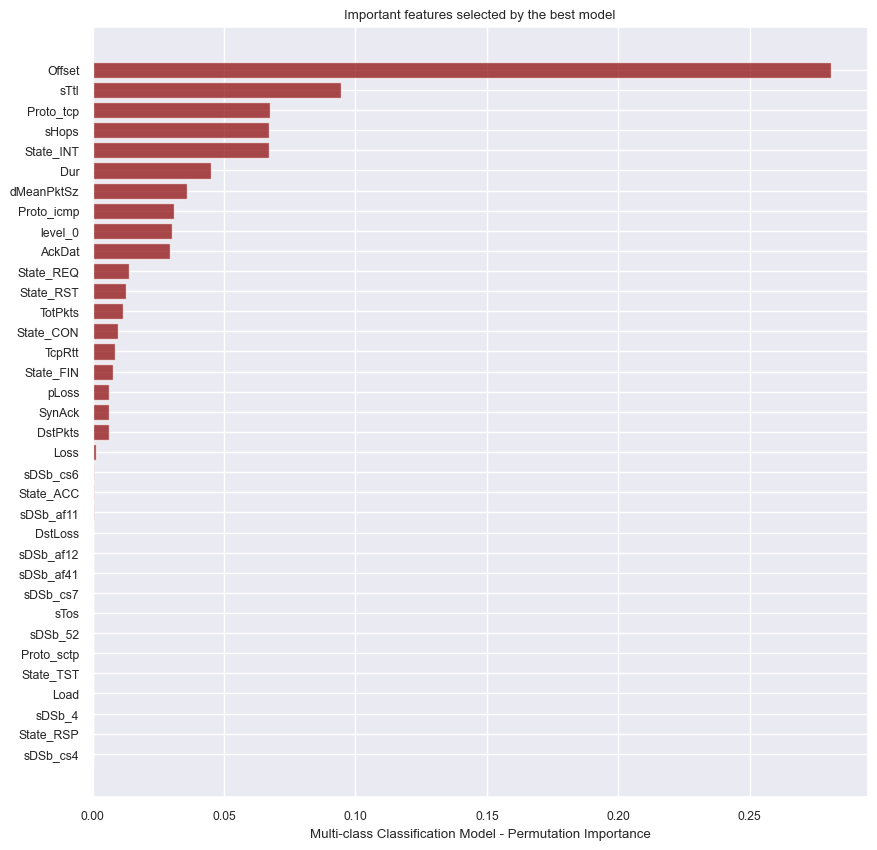

In [113]:
# Using multi-class best model, lets use it to get the top features that were selected. 
# Best on the result, features will be selected for further analysis before they are dropped.

results = permutation_importance(best_model_mc, Xmc_train, ymc_train, n_repeats=30, random_state=42)
important_features = results.importances_mean
sorted_idx = np.argsort(important_features)

sns.set(style="darkgrid",font_scale=0.8)
fig, axs = plt.subplots(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), important_features[sorted_idx], color='darkred', alpha=0.7)
plt.yticks(range(len(sorted_idx)), Xmc_test.columns[sorted_idx]);
plt.xlabel('Multi-class Classification Model - Permutation Importance')
plt.title('Important features selected by the best model')
plt.savefig('images/multi-class_permutation_importance.png', bbox_inches='tight')
plt.show()
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

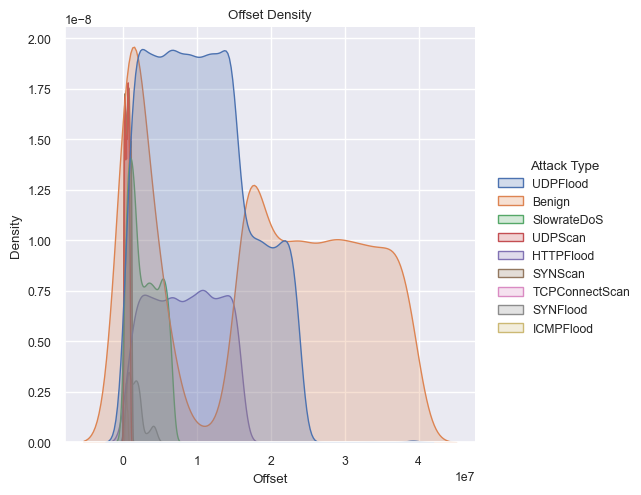

In [114]:
sns.displot(df, x="Offset", hue="Attack Type", kind="kde", fill=True)
plt.title('Offset Density')
plt.savefig('images/mc_offset_density.png', bbox_inches='tight')
plt.show()
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

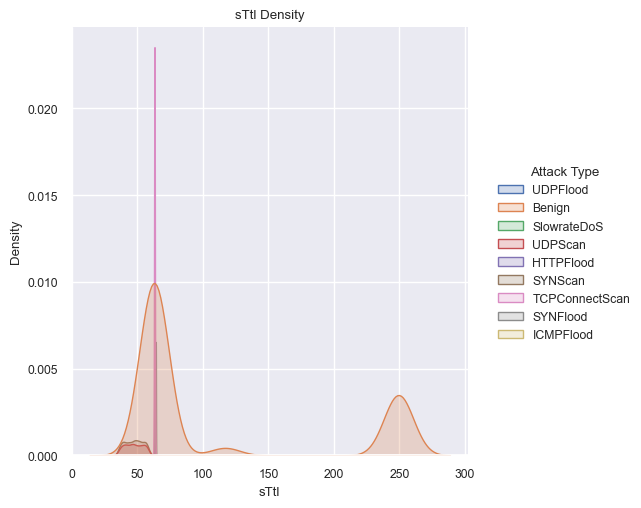

In [115]:
sns.displot(df, x="sTtl", hue="Attack Type", kind="kde", fill=True)
plt.title('sTtl Density')
plt.savefig('images/mc_sttl_density.png', bbox_inches='tight')
plt.show()
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

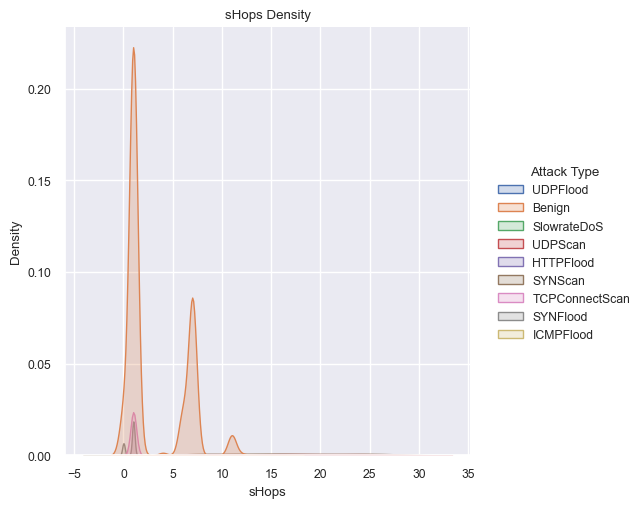

In [116]:
sns.displot(df, x="sHops", hue="Attack Type", kind="kde", fill=True)
plt.title('sHops Density')
plt.savefig('images/mc_shops_density.png', bbox_inches='tight')
plt.show()
plt.close()
plt.clf()

#### Conclusion
* For binary classification, target feature is balanced
* For multi-class classification, target feature is imbalanced. Therefore, examined F1-score.
* All of the models performed weel. The best model for binary classification is DT while the best model for multi-class classification is KNN.
* DT and KNN performance was very close, therefore for deployment, KNN will be used to predict 'Label' at level 1 and 'Attack Type' at level 2.
  